<a href="https://colab.research.google.com/github/kecosz/FASTexELA/blob/main/amed_FAST_rELA0_74_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## exELA codes for Suzuki et al. "Environmentally-extended energy landscape analysis identifies community-level microbiome biomarkers of liver disease progression"
### Notes: This is a temporary version released solely for the purpose of manuscript review. The official version will be published later, together with sample data, after the code has been organized.


## Environment setup

In [ ]:
## rpy2 version specification
### Required to successfully execute "%load_ext rpy2.ipython" as of 2023/1
!pip install rpy2==3.5.1
#!pip install --upgrade ipykernel
%load_ext rpy2.ipython

###The following codes is just for not showing rpy2 messages related to R package installation on google colab
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)   # will display errors, but not warnings

## Doanload rELA package
!rm -r rELA
!git clone https://github.com/kecosz/rELA.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Cloning into 'rELA'...
remote: Enumerating objects: 1021, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 1021 (delta 195), reused 114 (delta 114), pack-reused 764 (from 2)
Receiving objects: 100% (1021/1021), 11.09 MiB | 9.85 MiB/s, done.
Resolving deltas: 100% (500/500), done.


In [ ]:
%%R
# [for Google Colab]
# from v0.50, Due to errors in installing igraph and tidygraph
#system("add-apt-repository -y ppa:marutter/rrutter4.0")
#system("add-apt-repository -y ppa:c2d4u.team/c2d4u4.0+")
#system("add-apt-repository ppa:cran/v8")
#system("apt-get update")
#system("apt-get install libnode-dev")
#system("apt-get install r-cran-igraph r-cran-tidygraph")

NULL


In [ ]:
%%R
## package instllation
install.packages("Rcpp")
install.packages("RcppArmadillo")
install.packages("doParallel")
install.packages('tidyverse')
install.packages('gsubfn')
install.packages('zoo')
install.packages('dplyr')
install.packages('tidyr')
install.packages('ggplot2')
install.packages('gtools')
install.packages('ggsci')
install.packages('igraph')
install.packages('tidygraph')
install.packages('RColorBrewer')
install.packages("stringdist")
install.packages("purrr")
install.packages("plot3D")
install.packages("devtools")
library("Rcpp")
library("RcppArmadillo")
library("doParallel")
library('tidyverse')
library('gsubfn')
library('zoo')
library('dplyr')
library('tidyr')
library('ggplot2')
library('gtools')
library('ggsci')
library('igraph')
library('tidygraph')
library('RColorBrewer')
library("stringdist")
library("purrr")
library("plot3D")
library("devtools")

In [ ]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

In [ ]:
#%%R
## If already installed
#detach("package:rELA",unload=TRUE)
#remove.packages("rELA")

In [ ]:
!ls

ela_fast  rELA	sample_data


In [ ]:
%%R
install_local("rELA/rELA.v0.74.2.tar.gz",type="source")

# optional: install rELA package
# install.packages("/content/rELA.v0.70.tar.gz",type = "source")

library("rELA")

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpg4pO3C/remotes2093468be02/rELA.v0.74.2/DESCRIPTION’ ... OK
* preparing ‘rELA’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* installing the package to process help pages
* saving partial Rd database
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rELA_0.742.tar.gz’



## Data preparation


In [ ]:
# Mount Google Drive and load data
## Google Drive cannot be mounted in Local Runtime.
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#%%R
#baseabtable <- read.csv('/content/drive/MyDrive/data/amed/080823/level-7e.csv', sep=',', fileEncoding='utf-8') %>%
#  column_to_rownames(., var = "index")
#basemetadata <- read.csv('/content/drive/MyDrive/data/amed/080823/metadata_080823.csv', sep=',', fileEncoding='utf-8') %>%
#  column_to_rownames(., var = "Name")

In [ ]:
%%R
# use mouted local drive
baseabtable <- read.csv('ela_fast/080823/level-7e.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "index")
basemetadata <- read.csv('ela_fast/080823/metadata_080823.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "Name")

In [ ]:
%%R
readcounts <- rowSums(baseabtable)

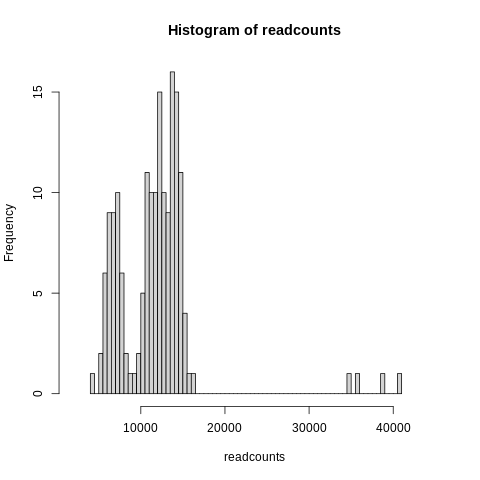

In [ ]:
%%R
hist(readcounts, xlim = c(2000, 45000), breaks = 100)

In [ ]:
%%R
# Compute IQR-based thresholds
#Q1 <- quantile(readcounts, 0.25)
#Q3 <- quantile(readcounts, 0.75)
#IQR_val <- Q3 - Q1
#
#lower_bound <- Q1 - 1.5 * IQR_val
#upper_bound <- Q3 + 1.5 * IQR_val
#
#outlier_flag <- ifelse(readcounts < lower_bound | readcounts > upper_bound, 1, 0)
#outlier_flag
lower_bound <- 10000
upper_bound <- 20000

outlier_flag <- ifelse(readcounts < lower_bound | readcounts > upper_bound, 1, 0)
outlier_flag

F286 F287 F288 F289 F290 F300 F701 F703 F704 F705 F706 F707 F708 F709 F713 F714 
   0    0    0    0    0    1    1    0    1    0    1    0    0    1    1    0 
F715 F716 F718 F719 F721 F722 F723 F724 F725 F746 F747 F749 F750 F752 F753 F755 
   0    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0 
F756 F757 F758 F759 F760 F761 F763 F764 F765 F766 F767 F768 F770 F773 F774 F775 
   0    0    1    1    0    0    0    0    0    0    1    0    0    0    1    1 
F776 F777 F779 F780 F782 F784 F785 F801 F802 F803 F804 F805 F806 F808 F809 F810 
   0    0    1    0    0    1    0    0    0    0    0    0    0    0    0    0 
F811 F812 F813 F814 F815 F816 F817 F819 F820 F821 F823 F825 F826 F827 F828 F829 
   0    0    0    1    0    1    0    1    0    1    0    0    0    0    0    1 
F830 F831 F832 F833 F834 F837 F838 F839 F840 F841 F842 F843 F844 F847 F848 F850 
   1    0    0    0    1    1    1    0    0    0    0    0    0    0    0    0 
F851 F852 F853 F854 F855 F85

In [ ]:
%%R
nonzero_counts <- apply(baseabtable, 1, function(row) sum(row != 0))
nonzero_counts

F286 F287 F288 F289 F290 F300 F701 F703 F704 F705 F706 F707 F708 F709 F713 F714 
  96  113   73   81   73   74   65   84   71  104   76   93   91   45   61  105 
F715 F716 F718 F719 F721 F722 F723 F724 F725 F746 F747 F749 F750 F752 F753 F755 
 134   84   85   95   85   47   49   80  166   86   64   31   72   89   77   90 
F756 F757 F758 F759 F760 F761 F763 F764 F765 F766 F767 F768 F770 F773 F774 F775 
 102   82  185   65   89  104   78  115   82   87  106  125   61   80  116  135 
F776 F777 F779 F780 F782 F784 F785 F801 F802 F803 F804 F805 F806 F808 F809 F810 
  61   75  122  105   82  128   81  136   86   81   85   70   70   89   64  126 
F811 F812 F813 F814 F815 F816 F817 F819 F820 F821 F823 F825 F826 F827 F828 F829 
  49   83  117   74  111   89   59   59   35   88  144   82   75   86   91   72 
F830 F831 F832 F833 F834 F837 F838 F839 F840 F841 F842 F843 F844 F847 F848 F850 
 104  135  133  128   60   81  122   59  110   94  117   87   90   38   65  143 
F851 F852 F853 F854 F855 F85

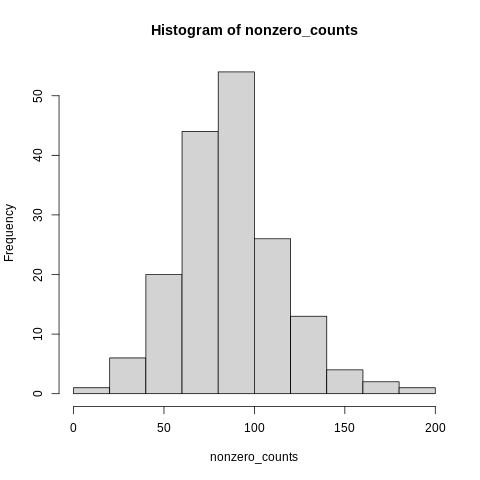

In [ ]:
%%R
hist(nonzero_counts)

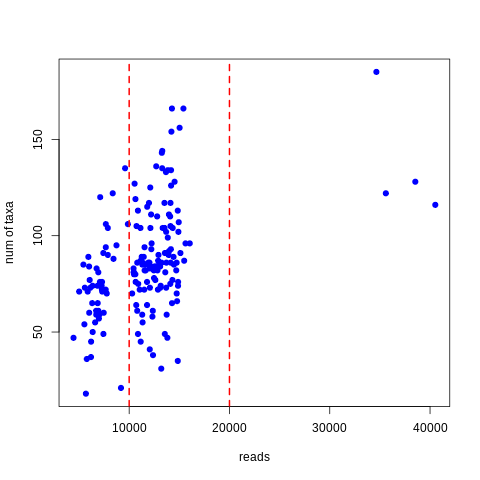

In [ ]:
%%R
# Create scatter plot
plot(readcounts, nonzero_counts,
     xlab = "reads",          # X-axis label
     ylab = "num of taxa",          # Y-axis label
     pch = 19,            # Point type (solid circle)
     col = "blue")        # Point color
# Add vertical red lines at x = 10000 and 20000
abline(v = 10000, col = "red", lwd = 2, lty = 2)
abline(v = 20000, col = "red", lwd = 2, lty = 2)

Use the following function to shorten taxonomic labels

In [ ]:
%%R
shorten_taxon_label <- function(taxon_vec) {
  raw_labels <- sapply(taxon_vec, function(label) {
    # Replace trailing "__" with "__uc"
    label <- sub("__$", "__uc", label)

    # Split using taxonomic prefixes like d__, p__, etc.
    parts <- unlist(strsplit(label, "(^|\\.)[dpcofgs]__"))
    parts <- parts[parts != ""]

    # Reverse the parts for back-to-front search
    parts_rev <- rev(parts)

    # Define what is considered "uninformative"
    invalids <- c("uncultured", "human_gut", "gut_metagenome", "unclassified")
    is_valid <- function(x) {
      !(nchar(x) <= 4 || tolower(x) %in% invalids)
    }

    valid_pos <- which(sapply(parts_rev, is_valid))

    if (length(valid_pos) == 0) {
      return(NA_character_)
    }

    keep_parts <- parts_rev[1:valid_pos[1]]

    # Join and clean the final label
    final <- paste(rev(keep_parts), collapse = ".")
    final <- gsub("__", "", final)
    final <- sub("^\\.", "", final)

    return(final)
  }, USE.NAMES = FALSE)

  # Append suffixes to duplicates to make them unique
  counts <- ave(seq_along(raw_labels), raw_labels, FUN = seq_along)
  result <- ifelse(is.na(raw_labels), NA_character_,
                   ifelse(counts == 1, raw_labels, paste0(raw_labels, ".", counts)))

  return(result)
}



In [ ]:
%%R
## apply short taxon name
colnames(baseabtable) <- shorten_taxon_label(colnames(baseabtable))

Data formatting for data analysis

In [ ]:
%%R

Formatting2 <- function(baseabtable, basemetadata = NULL, normalize, parameters,
                       th_method = "global", grouping = 0, grouping_th = 0,
                       reporting = TRUE) {
  ath <- parameters[1]
  minocth <- parameters[2]
  maxocth <- parameters[3]
  maxval_th <- if (length(parameters) >= 4) parameters[4] else -1  # default = 100%

  group_table <- NULL  # prepare output

  if (length(basemetadata) != 0) {
    specieslabel <- colnames(baseabtable)
    absamplelabel <- rownames(baseabtable)
    mdsamplelabel <- rownames(basemetadata)
    sharedsamplelabel <- sort(intersect(absamplelabel, mdsamplelabel))
    patab <- match(sharedsamplelabel, absamplelabel)
    patmd <- match(sharedsamplelabel, mdsamplelabel)
    abnum <- baseabtable[patab, ]
    if (normalize == 1) {
      abnum <- t(apply(abnum, 1, function(x) x / (sum(x) + 1e-16)))
    }

    max_per_col <- apply(abnum, 2, max, na.rm = TRUE)
    keep_species <- names(max_per_col[max_per_col > maxval_th])
    abnum <- abnum[, keep_species, drop = FALSE]

    ath_vector <- switch(th_method,
      global = rep(ath, ncol(abnum)),
      max = apply(abnum, 2, max, na.rm = TRUE) * ath,
      median = apply(abnum, 2, median, na.rm = TRUE) * ath,
      stop("Invalid th_method: must be one of 'global', 'max', or 'median'")
    )
    names(ath_vector) <- colnames(abnum)

    aboc <- mapply(function(col, threshold) {
      ifelse(col >= threshold, 1, 0)
    }, as.data.frame(abnum), ath_vector)
    aboc <- as.matrix(aboc)
    rownames(aboc) <- rownames(abnum)
    colnames(aboc) <- colnames(abnum)

    aboc_mean <- apply(aboc, 2, mean)
    occrit <- names(aboc_mean[(aboc_mean > minocth) & (aboc_mean < maxocth)])
    ocmatrix <- aboc[, occrit, drop = FALSE]
    abmatrix <- abnum[, occrit, drop = FALSE]
    fctmatrix <- as.matrix(as.data.frame(basemetadata[patmd, ]))
    rownames(fctmatrix) <- rownames(ocmatrix)
    colnames(fctmatrix) <- colnames(basemetadata)
    samplelabel <- sharedsamplelabel
    specieslabel <- occrit
    factorlabel <- colnames(basemetadata)
  } else {
    specieslabel <- colnames(baseabtable)
    absamplelabel <- rownames(baseabtable)
    sharedsamplelabel <- sort(absamplelabel)
    patab <- match(sharedsamplelabel, absamplelabel)
    abnum <- baseabtable[patab, ]
    if (normalize == 1) {
      abnum <- t(apply(abnum, 1, function(x) x / (sum(x) + 1e-16)))
    }

    max_per_col <- apply(abnum, 2, max, na.rm = TRUE)
    keep_species <- names(max_per_col[max_per_col > maxval_th])
    abnum <- abnum[, keep_species, drop = FALSE]

    ath_vector <- switch(th_method,
      global = rep(ath, ncol(abnum)),
      max = apply(abnum, 2, max, na.rm = TRUE) * ath,
      median = apply(abnum, 2, median, na.rm = TRUE) * ath,
      stop("Invalid th_method: must be one of 'global', 'max', or 'median'")
    )
    names(ath_vector) <- colnames(abnum)

    aboc <- mapply(function(col, threshold) {
      ifelse(col >= threshold, 1, 0)
    }, as.data.frame(abnum), ath_vector)
    aboc <- as.matrix(aboc)
    rownames(aboc) <- rownames(abnum)
    colnames(aboc) <- colnames(abnum)

    aboc_mean <- apply(aboc, 2, mean)
    occrit <- names(aboc_mean[(aboc_mean > minocth) & (aboc_mean < maxocth)])
    ocmatrix <- aboc[, occrit, drop = FALSE]
    abmatrix <- abnum[, occrit, drop = FALSE]
    fctmatrix <- NULL
    samplelabel <- sharedsamplelabel
    specieslabel <- occrit
    factorlabel <- NULL
  }



  if (grouping == 1) {
    ocvstr <- apply(ocmatrix, 2, function(y) paste(y, collapse = ""))
    oo <- order(ocvstr)
    ov <- ocvstr[oo]
    j <- ""
    cc <- 0
    binlist <- list()

    aaa <- foreach(i = ov) %do% {
      cc <- cc + 1
      if (stringdist(i, j, method = "hamming") / nchar(i) <= grouping_th) {
        a <- rev(binlist)[[1]]
        aa <- append(a, cc)
        binlist <- append(binlist[-length(binlist)], list(aa))
      } else {
        binlist <- append(binlist, list(cc))
      }
      j <- i
    }

    ltx <- length(specieslabel)

    # Prepare updated species labels (only for grouped entries)
    updated_specieslabel <- character(length(binlist))
    group_table_list <- list()
    group_counter <- 1

    for (k in seq_along(binlist)) {
      idx <- binlist[[k]]
      original_labels <- specieslabel[oo][idx]
      if (length(idx) > 1) {
        group_id <- paste0("Group_", group_counter)
        updated_specieslabel[k] <- group_id

        padded <- c(original_labels, rep(NA, max(lengths(binlist)) - length(original_labels)))
        names(padded) <- paste0("taxa_", seq_along(padded))
        group_table_list[[group_id]] <- padded

        group_counter <- group_counter + 1
      } else {
        updated_specieslabel[k] <- original_labels
      }
    }

    # Combine group table
    if (length(group_table_list) > 0) {
      group_table <- do.call(rbind, group_table_list)
      group_table <- as.data.frame(group_table, stringsAsFactors = FALSE)
      group_table <- tibble::rownames_to_column(group_table, var = "Group_ID")
    }

    specieslabel <- updated_specieslabel

    ocmatrix <- foreach(i = binlist, .combine = "cbind") %do% {
      ocmatrix[, oo][, i[1]]
    }
    abmatrix <- foreach(i = binlist, .combine = "cbind") %do% {
      if (length(i) > 1) {
        apply(abmatrix[, oo][, i], 1, sum)
      } else {
        abmatrix[, oo][, i]
      }
    }
    colnames(ocmatrix) <- specieslabel
    colnames(abmatrix) <- specieslabel
  }

  if (reporting) {
    cat("Processed", as.character(length(samplelabel)), "samples.\n")
    cat("Threshold method:", th_method, "\n")
    cat("Threshold value (ath):", ath, "\n")
    cat("Minimum max abundance threshold:", maxval_th, "\n")
    cat("Occurrence threshold range:", minocth, "~", maxocth, "\n")
    if (grouping == 1) {
      cat(as.character(ltx - length(specieslabel)), " groups were found.\n")
    }
    cat("Selected", as.character(length(specieslabel)), "of", as.character(ncol(baseabtable)), "species.\n")
  }

  return(list(
    ocmatrix = ocmatrix,
    abmatrix = abmatrix,
    fctmatrix = fctmatrix,
    samplelabel = samplelabel,
    specieslabel = specieslabel,
    factorlabel = factorlabel,
    group_table = group_table
  ))
}


In [ ]:
%%R
# To group species with the same presence/absence pattern into one group,
#set grouping to 1 and specify a number between 0 and 1 for grouping_th.
# If 0, only species with the same presence/absence pattern will be grouped together.
## Make sure that the same classification labels do not appear in the abundance table. ##
list[ocmat, abmat, enmat, samplelabel, specieslabel, factorlabel, group_table] <-
  Formatting2(baseabtable, basemetadata, normalize=1, parameters=c(0.01, 0.05, 0.95, 0.05), grouping=1, grouping_th=0.)

Processed 171 samples.
Threshold method: global 
Threshold value (ath): 0.01 
Minimum max abundance threshold: 0.05 
Occurrence threshold range: 0.05 ~ 0.95 
0  groups were found.
Selected 58 of 929 species.


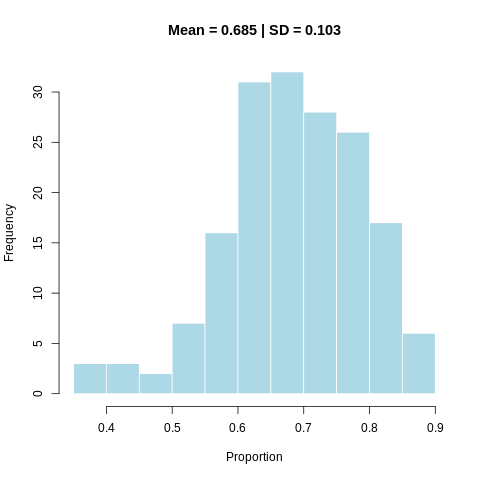

In [ ]:
%%R
# calculate taxon cover
ratios <- apply(baseabtable, 1, function(row) {
  sum(row[specieslabel]) / sum(row)
})
hist(ratios,
     main = paste("Mean =", round(mean(ratios), 3),
                  "| SD =", round(sd(ratios), 3)),
     xlab = "Proportion",
     col = "lightblue",
     border = "white")

check the position of FAST_score and PPI

In [ ]:
%%R
which(factorlabel == "FAST_score")

[1] 27


In [ ]:
%%R
which(factorlabel == "PPI")

[1] 790


pick up FAST_score and PPI row and combine as a new matrix

In [ ]:
%%R
enmat_p <- data.frame(FAST_score = scale(as.numeric(enmat[, 27]) ** 0.5), PPI = as.numeric(enmat[, 790]), outlier_flag = outlier_flag)
rownames(enmat_p) <- samplelabel

In [ ]:
%%R
0.67 ** 0.5

[1] 0.8185353


In [ ]:
%%R
0.33 ** 0.5

[1] 0.5744563


In [ ]:
%%R
mm <- as.numeric(enmat[, 27])**0.5
(c(0.574, 0.8186) - mean(mm[!is.na(mm)]))/(sd(mm[!is.na(mm)]))

[1] 0.1612675 1.2135954


**Since the distribution is flatter than the raw values, the square root of FAST_score is used for analysis.**

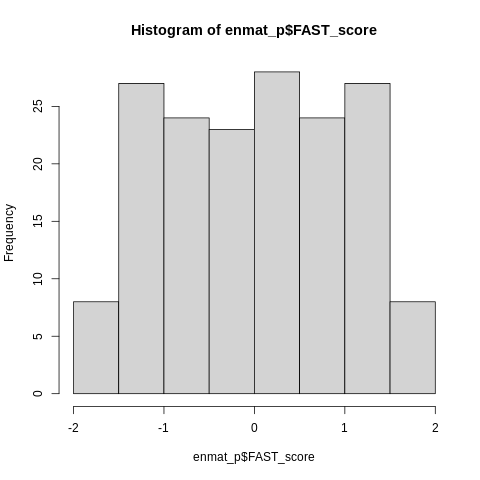

In [ ]:
%%R
hist(enmat_p$FAST_score)

In [ ]:
%%R
dim(enmat_p)

[1] 171   3


remove FAST_score=NA and PPI=1

In [ ]:
%%R
rows_to_keep <- !is.na(enmat_p[, 1]) & enmat_p[, 2] != 1 & enmat_p[, 3] != 1

# remove the corresponding columns from data matrices
enmat_p_filtered <- enmat_p[rows_to_keep, ]
enmat_fastscore_filtered <- as.matrix(enmat_p_filtered[, 1, drop = FALSE])
ocmat_filtered <- ocmat[rows_to_keep, , drop = FALSE]
abmat_filtered <- abmat[rows_to_keep, , drop = FALSE]
samplelabel_filtered <- samplelabel[rows_to_keep]

In [ ]:
%%R
dim(enmat_p_filtered)

[1] 104   3


In [ ]:
%%R
mmf <- enmat_p_filtered$FAST_score
length(mmf[mmf>1.21])/104

[1] 0.1923077


In [ ]:
%%R
mmf <- enmat_p_filtered$FAST_score
length(mmf[mmf<0.16])/104

[1] 0.5769231


In [ ]:
%%R
if(!isNamespaceLoaded("reshape2")) install.packages("reshape2")

In [ ]:
%%R
library(reshape2)

plot_binary_matrix <- function(mat) {
  mat <- as.matrix(mat)

  # Convert matrix to data frame
  df <- melt(mat)
  colnames(df) <- c("Row", "Column", "Value")

  # Convert row and column indices to numeric (for proper order and scale_y_reverse)
  df$Row <- as.numeric(df$Row)
  df$Column <- as.numeric(df$Column)

  # Plot
  ggplot(df, aes(x = Column, y = Row, fill = factor(Value))) +
    geom_tile(color = "grey") +
    scale_fill_manual(values = c("0" = "black", "1" = "white")) +
    scale_y_reverse() +  # Flip vertical axis (top to bottom like matrix)
    theme_minimal() +
    labs(title = "Binary Matrix Plot", fill = "Value") +
    theme(
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      axis.title = element_blank(),
      legend.position = "none"
    )
}

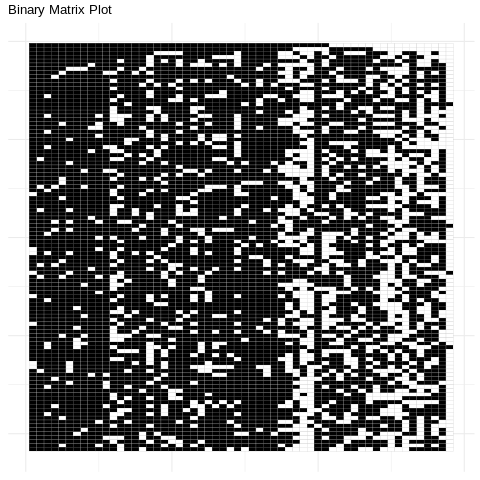

In [ ]:
%%R
plot_binary_matrix(ocmat_filtered)

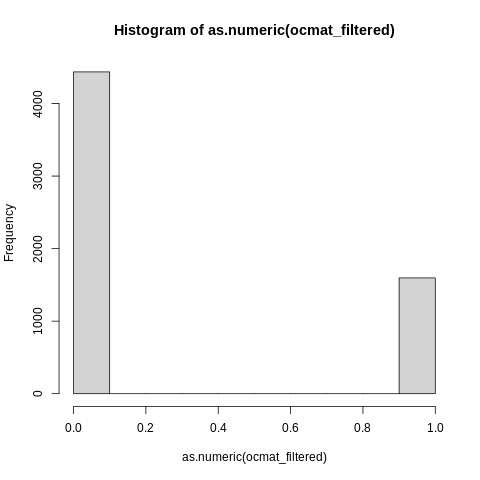

In [ ]:
%%R
hist(as.numeric(ocmat_filtered))

In [ ]:
%%R
median(as.numeric(abmat_filtered))

[1] 0


## Preperation of reference data analysis

### Association between microbiome and FAST score

In [ ]:
%%R
install.packages('vegan')
install.packages('scales')
install.packages('gridExtra')

The `microbiome_continuous_analysis` function is designed to comprehensively evaluate and visualize the relationship between microbial community composition (`community_matrix`) and a continuous environmental variable (specified by `env_name` in `env_matrix`). It performs the following analyses:

* **Alpha diversity analysis** using the Shannon index, plotted against the environmental variable, with correlation statistics (Spearman correlation and p-value).
* **Correlation analysis** between each taxon's relative abundance and the environmental variable, visualized as a bar plot (positive in blue, negative in red).
* **Multivariate ordination methods** including RDA (Redundancy Analysis), CCA (Canonical Correspondence Analysis), NMDS (Non-metric Multidimensional Scaling), and db-RDA (distance-based RDA), each with environmental vectors shown as arrows and colored sample points based on the environmental value.
* **Variance explanation** for db-RDA shown as a bar chart, indicating the proportion of variance explained by the environmental factor.
* **PERMANOVA (adonis2)** to test for statistical significance of the environmental effect on community composition.

The function returns a list of ggplot2 visualizations and data frames, providing both statistical and visual insights into how the microbiome varies along a continuous environmental gradient.


In [ ]:
%%R
library(vegan)
library(scales)
library(ggplot2)
library(dplyr)
library(reshape2)
library(gridExtra)

# funtion for evaluation
# depends on vegan, ggplot2, scales, dplyr
microbiome_base_analysis <- function(community_matrix, env_matrix, env_name, distance="bray") {

  if (!(env_name %in% colnames(env_matrix))) {
    stop("The specified env_name does not exist in env_matrix.")
  }
  env_vector <- as.numeric(env_matrix[, env_name])

  if(length(env_vector) != nrow(community_matrix)) {
    stop("Length of env_vector must equal the number of samples (rows) in community_matrix")
  }

  community_matrix <- as.data.frame(community_matrix, check.names=FALSE)

  theme_large <- theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 16),
    legend.title = element_text(size = 18),
    legend.text = element_text(size = 16),
    strip.text = element_text(size = 16)
  )

  ### 0. Alpha diversity (Shannon index)
  # Define a plotting function for each diversity index vs environment
  plot_alpha_div <- function(df, metric, env_name) {
    cor_test <- suppressWarnings(cor.test(df[[metric]], df$Env, method = "spearman"))
    corr_val <- sprintf("%.3f", cor_test$estimate)
    p_val    <- sprintf("%.3f", cor_test$p.value)

    ggplot(df, aes_string(x = "Env", y = metric)) +
      geom_point(color = "darkblue", size = 2.5) +
      geom_smooth(method = "lm", se = TRUE, color = "black") +
      labs(
        x = expression(epsilon[FAST]),
        y = metric,
        title = paste0(metric, " vs ", env_name, "\n",
                      "Spearman \u03C1 = ", corr_val, ", p = ", p_val)
      ) +
      theme_minimal()
  }

  # Calculate alpha diversity indices
  shannon <- diversity(community_matrix, index = "shannon")
  simpson <- diversity(community_matrix, index = "simpson")
  observed_species <- specnumber(community_matrix)

  # Calculate Pielou's evenness: J = Shannon / log(S)
  pielou <- ifelse(observed_species > 1, shannon / log(observed_species), NA)

  # Combine all diversity indices into a single data frame (order adjusted)
  alpha_diversity_df <<- data.frame(
    Sample = rownames(community_matrix),
    Observed = observed_species,
    Simpson = simpson,
    Shannon = shannon,
    Pielou = pielou,
    Env = env_vector
  )

  # Display the alpha diversity table
  print(alpha_diversity_df)

  # Generate individual plots (order adjusted)
  p1 <- plot_alpha_div(alpha_diversity_df, "Observed", env_name)
  p2 <- plot_alpha_div(alpha_diversity_df, "Simpson", env_name)
  p3 <- plot_alpha_div(alpha_diversity_df, "Shannon", env_name)
  p4 <- plot_alpha_div(alpha_diversity_df, "Pielou", env_name)

  # Arrange plots in a 2x2 grid
  alpha_grid <- grid.arrange(p1, p2, p3, p4, ncol = 2)

  # Perform Spearman correlation between each index and the environment variable (order adjusted)
  cor_results <- lapply(c("Observed", "Simpson", "Shannon", "Pielou"), function(metric) {
    ct <- suppressWarnings(cor.test(alpha_diversity_df[[metric]], alpha_diversity_df$Env, method = "spearman"))
    data.frame(Metric = metric, Spearman = ct$estimate, PValue = ct$p.value)
  })

  # Display the correlation results
  cor_results_df <- do.call(rbind, cor_results)
  print(cor_results_df)

  ### 1. Spearman correlation for each taxon
  rho <- numeric(ncol(community_matrix))
  pval <- numeric(ncol(community_matrix))
  for(i in seq_along(rho)) {
    xi <- community_matrix[[i]]
    test <- suppressWarnings(cor.test(xi, env_vector, method="spearman"))
    rho[i] <- if(!is.null(test$estimate)) test$estimate else NA
    pval[i] <- if(!is.null(test$p.value)) test$p.value else NA
  }
  padj <- p.adjust(pval, method="fdr")
  correlation_table <- data.frame(
    Taxon = colnames(community_matrix),
    SpearmanRho = rho,
    PValue = pval,
    FDR = padj,
    stringsAsFactors = FALSE
  )

  ### 1b. Correlation barplot (filtered by P < 0.1)
  cor_bar_data <- correlation_table %>%
    filter(PValue < 1.0) %>%
    mutate(Direction = ifelse(SpearmanRho > 0, "Positive", "Negative"),
           Color = ifelse(Direction == "Positive", "blue", "red")) %>%
    arrange(desc(SpearmanRho))

  cor_bar_data$Taxon <- factor(cor_bar_data$Taxon, levels = rev(cor_bar_data$Taxon))

  correlation_barplot <- ggplot(cor_bar_data, aes(x = SpearmanRho, y = Taxon, fill = Direction)) +
    geom_col(width = 0.7) +
    scale_fill_manual(values = c("Positive" = "blue", "Negative" = "red")) +
    labs(x = "Spearman Correlation", y = "Taxon",
         title = "\u03C1_FAST") +
    theme_minimal()

  ### 2. RDA
  env_df <<- data.frame(env=env_vector)
  colnames(env_df) <- env_name
  rda_model <- rda(community_matrix ~ ., data=env_df)
  rda_sites <- scores(rda_model, display="sites", choices=1:2, scaling=2)
  rda_sites_df <- as.data.frame(rda_sites)
  colnames(rda_sites_df) <- c("RDA1", "RDA2")
  rda_sites_df$Sample <- rownames(rda_sites_df)
  rda_sites_df$EnvValue <- env_vector
  rda_bp <- scores(rda_model, display="bp", choices=1:2, scaling=2)
  env_arrow <- as.data.frame(rda_bp)
  colnames(env_arrow) <- c("RDA1", "RDA2")
  env_arrow$Variable <- rownames(rda_bp)
  rda_plot <- ggplot() +
    geom_point(data=rda_sites_df, aes(x=RDA1, y=RDA2, color=EnvValue), size=3) +
    geom_segment(data=env_arrow, aes(x=0, y=0, xend=RDA1, yend=RDA2),
                 arrow=arrow(length=unit(0.3,"cm")), color="black") +
    geom_text(data=env_arrow, aes(x=RDA1, y=RDA2, label=Variable),
              color="black", vjust=-0.5, hjust=1, size=5) +
    scale_color_gradient(low="blue", high="red") +
    labs(title="RDA: Community ~ Continuous Variable", x="RDA1", y="RDA2", color=env_name) +
    theme_minimal() + theme_large


  ### 3. CCA
  cca_model <<- cca(community_matrix ~ ., data=env_df)
  cca_sites <- scores(cca_model, display="sites", choices=1:2, scaling=2)
  cca_sites_df <- as.data.frame(cca_sites)
  colnames(cca_sites_df) <- c("CCA1", "CCA2")
  cca_sites_df$Sample <- rownames(cca_sites_df)
  cca_sites_df$EnvValue <- env_vector
  cca_bp <- scores(cca_model, display="bp", choices=1:2, scaling=2)
  env_arrow2 <- as.data.frame(cca_bp)
  colnames(env_arrow2) <- c("CCA1", "CCA2")
  env_arrow2$Variable <- rownames(cca_bp)
  cca_plot <- ggplot() +
    geom_point(data=cca_sites_df, aes(x=CCA1, y=CCA2, color=EnvValue), size=3) +
    geom_segment(data=env_arrow2, aes(x=0, y=0, xend=CCA1, yend=CCA2),
                 arrow=arrow(length=unit(0.3,"cm")), color="black") +
    geom_text(data=env_arrow2, aes(x=CCA1, y=CCA2, label=Variable),
              color="black", vjust=-0.5, hjust=1, size=5) +
    scale_color_gradient(low="blue", high="red") +
    labs(title="CCA: Community ~ Continuous Variable", x="CCA1", y="CCA2", color=env_name) +
    theme_minimal() + theme_large

  ### 4. NMDS + envfit
  nmds_model <<- metaMDS(community_matrix, distance=distance, trace=FALSE)
  nmds_sites <- scores(nmds_model, display="sites")
  nmds_sites_df <- as.data.frame(nmds_sites)
  nmds_sites_df$Sample <- rownames(nmds_sites_df)
  nmds_sites_df$EnvValue <- env_vector
  env_fit <- envfit(nmds_model ~ ., data=env_df, perm=999)
  vf <- env_fit$vectors
  if(!is.null(vf$arrows)) {
    arrow_coords <- vf$arrows[1,] * sqrt(vf$r[1])
    arrow_df <- data.frame(NMDS1=arrow_coords[1], NMDS2=arrow_coords[2],
                           Variable=rownames(vf$arrows)[1])
  } else {
    arrow_df <- data.frame(NMDS1=numeric(), NMDS2=numeric(), Variable=character())
  }
  nmds_plot <- ggplot() +
    geom_point(data=nmds_sites_df, aes(x=NMDS1, y=NMDS2, color=EnvValue), size=3) +
    { if(nrow(arrow_df) > 0) geom_segment(data=arrow_df, aes(x=0, y=0, xend=NMDS1, yend=NMDS2),
                 arrow=arrow(length=unit(0.3,"cm")), color="black") else NULL } +
    { if(nrow(arrow_df) > 0) geom_text(data=arrow_df, aes(x=NMDS1, y=NMDS2, label=Variable),
              color="black", vjust=-0.5, hjust=1, size=5) else NULL } +
    scale_color_gradient(low="blue", high="red") +
    labs(title=paste("NMDS (", distance, ") + Envfit", sep=""), x="NMDS1", y="NMDS2",
         subtitle=paste("Stress:", round(nmds_model$stress, 3)), color=env_name) +
    theme_minimal() + theme_large

  ### 5. Distance-based RDA (db-RDA)
  dbrda_model <<- capscale(community_matrix ~ ., data=env_df, distance=distance)
  dbrda_sites <- scores(dbrda_model, display="sites", choices=1:2, scaling=1)
  dbrda_sites_df <- as.data.frame(dbrda_sites)
  colnames(dbrda_sites_df) <- c("dbRDA1", "dbRDA2")
  dbrda_sites_df$Sample <- rownames(dbrda_sites_df)
  dbrda_sites_df$EnvValue <- env_vector
  dbrda_bp <- scores(dbrda_model, display="bp", choices=1:2, scaling=1)
  env_arrow3 <- as.data.frame(dbrda_bp)
  colnames(env_arrow3) <- c("dbRDA1", "dbRDA2")
  env_arrow3$Variable <- rownames(dbrda_bp)
  dbrda_plot <- ggplot() +
    geom_point(data=dbrda_sites_df, aes(x=dbRDA1, y=dbRDA2, color=EnvValue), size=3) +
    geom_segment(data=env_arrow3, aes(x=0, y=0, xend=dbRDA1, yend=dbRDA2),
                 arrow=arrow(length=unit(0.3,"cm")), color="black") +
    geom_text(data=env_arrow3, aes(x=dbRDA1, y=dbRDA2, label=Variable),
              color="black", vjust=-0.5, hjust=1, size=5) +
    scale_color_gradient(low="blue", high="red") +
    labs(title=paste("db-RDA (", distance, " distance)", sep=""),
         x="dbRDA1", y="dbRDA2", color=env_name) +
    theme_minimal() + theme_large

  total_var <- dbrda_model$tot.chi
  cons_var <- dbrda_model$CCA$tot.chi
  R2 <- cons_var / total_var
  var_df <- data.frame(Component=c("Explained", "Residual"),
                       Variance=c(R2, 1-R2))
  dbrda_var_plot <- ggplot(var_df, aes(x=Component, y=Variance, fill=Component)) +
    geom_bar(stat="identity", width=0.6) +
    geom_text(aes(label=paste0(round(Variance*100,1), "%")), vjust=-0.5, size=6) +
    ylim(0,1) +
    labs(title="Variance Explained by Env (db-RDA)") +
    theme_minimal() + theme_large + theme(legend.position="none")

  ### 6. PERMANOVA
  dist_matrix <- vegdist(community_matrix, method=distance)
  adonis_res <- adonis2(dist_matrix ~ ., data=env_df, permutations=999)
  permanova_table <- as.data.frame(adonis_res)

  return(list(
    correlation_table = correlation_table,
    correlation_barplot = correlation_barplot,
    alpha_diversity_plot = alpha_grid,
    alpha_correlation = cor_results_df,
    rda_plot = rda_plot,
    cca_plot = cca_plot,
    nmds_plot = nmds_plot,
    dbrda_plot = dbrda_plot,
    dbrda_var_plot = dbrda_var_plot,
    permanova_table = permanova_table
  ))
}



     Sample Observed   Simpson  Shannon    Pielou          Env
F286   F286       29 0.9142547 2.852444 0.8471024  0.996395001
F287   F287       29 0.9140931 2.808688 0.8341079  0.882408335
F290   F290       30 0.8778249 2.656866 0.7811560  0.087167644
F703   F703       27 0.8715712 2.517875 0.7639562  1.316913600
F705   F705       24 0.8666342 2.465729 0.7758612 -0.947730426
F707   F707       30 0.9289030 2.918044 0.8579462 -1.091360933
F708   F708       26 0.8949144 2.653597 0.8144624 -1.447770151
F715   F715       31 0.9310207 2.930116 0.8532693  0.853269584
F716   F716       22 0.7513170 1.982049 0.6412235  1.265490687
F721   F721       26 0.9106570 2.776590 0.8522122 -1.091360933
F723   F723       23 0.8918249 2.560626 0.8166578 -0.641967795
F724   F724       19 0.8451239 2.211499 0.7510766 -0.755662638
F725   F725       26 0.9011172 2.627207 0.8063624 -0.817878522
F746   F746       32 0.9412133 3.070904 0.8860756  0.008608936
F747   F747       24 0.8414274 2.384498 0.7503013 -0.21

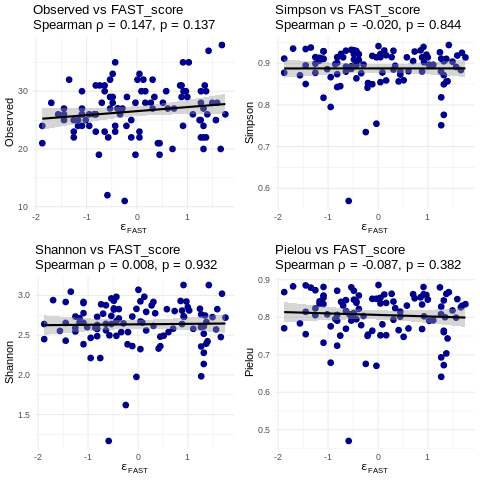

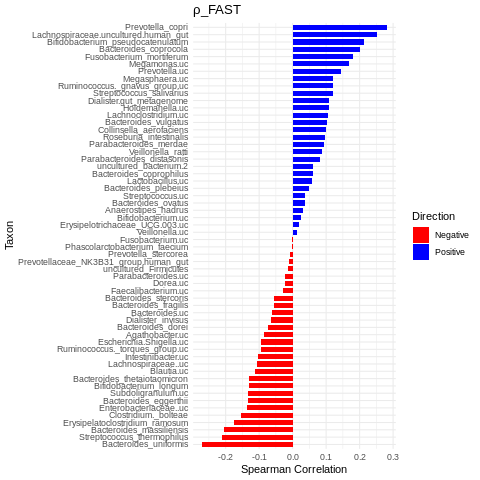

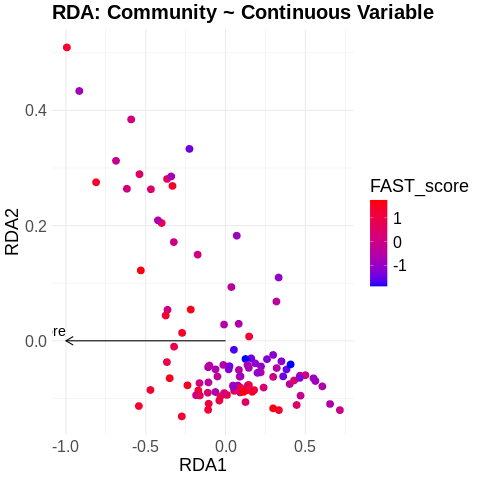

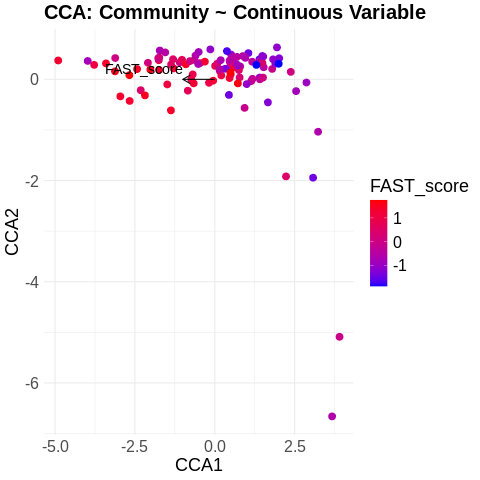

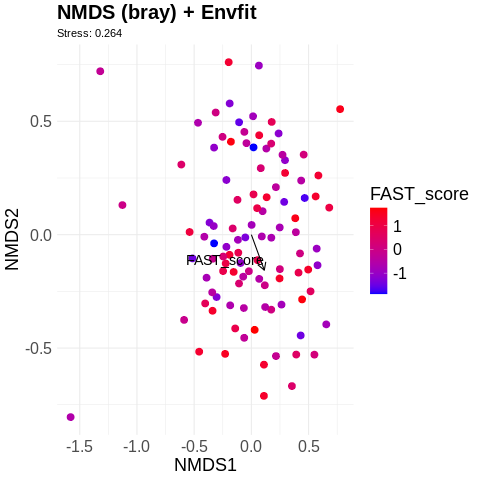

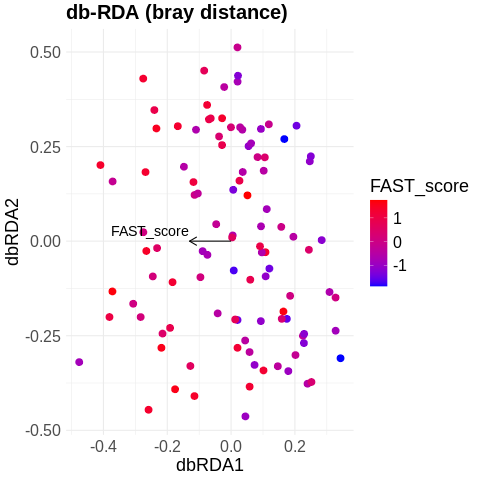

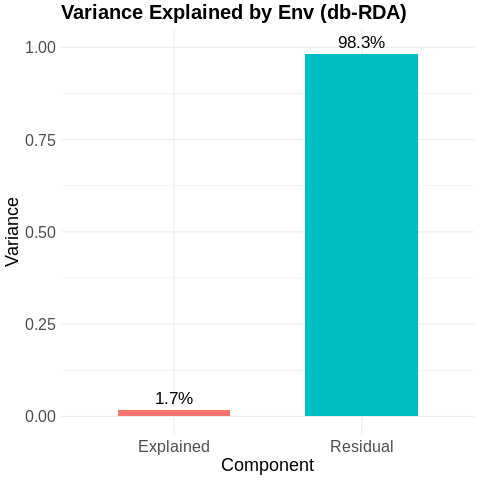

In [ ]:
%%R
colnames(abmat_filtered) <- colnames(abmat_filtered)
result <- microbiome_base_analysis(abmat_filtered, enmat_fastscore_filtered, "FAST_score")
result

In [ ]:
%%R
# 1. Beta diversity matrix (e.g., Bray-Curtis distance)
beta_dist <- vegdist(abmat_filtered, method = "bray")

# 2. FAST_score maximum matrix
# Create a matrix where each entry is max(FAST_i, FAST_j)
fast_scores <- enmat_fastscore_filtered[,1]
n <- length(fast_scores)
fast_max_matrix <- outer(fast_scores, fast_scores, pmax)  # pmax = pairwise max

# Convert to 'dist' object to match beta_dist
fast_max_dist <- as.dist(fast_max_matrix)

# 3. Mantel test between community distance and FAST_score maximum distance
mantel_result <- mantel(beta_dist, fast_max_dist, method = "spearman", permutations = 999)

# Output result
print(mantel_result)


Mantel statistic based on Spearman's rank correlation rho 

Call:
mantel(xdis = beta_dist, ydis = fast_max_dist, method = "spearman",      permutations = 999) 

Mantel statistic r: 0.05307 
      Significance: 0.186 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0741 0.0964 0.1117 0.1398 
Permutation: free
Number of permutations: 999



### Prediction of FAST score from microbiome

In [ ]:
%%R
# Load required packages
##install.packages('randomForest')
install.packages('xgboost')
install.packages('ranger')
install.packages('e1071')
install.packages('Metrics')
##library(randomForest)
library(xgboost)
library(ranger)
library(e1071)
library(Metrics)  # for rmse, r-squared

The `evaluate_models_cv` function performs a comprehensive comparison of predictive modeling techniques using microbiome composition data to predict a continuous target variable (e.g., an environmental or clinical parameter). The function operates as follows:

* **Cross-validation setup:** Implements a 10-fold cross-validation repeated 5 times, ensuring robust performance estimates across different data splits.
* **Model training and evaluation:** For each fold, four regression models are trained—Linear Regression, Support Vector Regression (SVR), Random Forest (via `ranger`), and XGBoost. Predictions are made on test sets for each model.
* **Performance metrics:** Depending on the selected `metric` ("correlation", "rmse", or "rsq"), model performance is evaluated using Pearson correlation, Root Mean Square Error, or R-squared, respectively.
* **External results integration:** Optionally, external performance scores can be supplied and included in the final visualization.
* **Visualization:** A boxplot with jittered points is generated using `ggplot2` to display the cross-validated performance of each model across all folds.

This function is particularly useful for benchmarking regression models that predict continuous variables from high-dimensional microbiome data, supporting metric flexibility and visual comparison.


In [ ]:
%%R
evaluate_models_cv <- function(microbiome_mat, metadata_mat, target_index, external_scores = NULL, metric = c("correlation", "rmse", "rsq")) {

  metric <- match.arg(metric)

  common_samples <- intersect(rownames(microbiome_mat), rownames(metadata_mat))
  if (length(common_samples) == 0) {
    stop("Error: No matching sample IDs between microbiome data and metadata.")
  }
  microbiome_sub <- microbiome_mat[common_samples, , drop=FALSE]
  metadata_sub   <- metadata_mat[common_samples, , drop=FALSE]

  target_vals <- as.numeric(metadata_sub[, target_index])
  complete_idx <- complete.cases(microbiome_sub) & !is.na(target_vals)
  microbiome_sub <- microbiome_sub[complete_idx, , drop=FALSE]
  target_vals    <- target_vals[complete_idx]

  set.seed(123)
  n <- nrow(microbiome_sub)
  K <- 10 # k-folds
  n_rep <- 20
  folds_list <- list()

  for (rep in 1:n_rep) {
    idx_shuffled <- sample(n)
    fold_sizes <- rep(floor(n / K), K)
    remainder <- n %% K
    if (remainder > 0) {
      fold_sizes[1:remainder] <- fold_sizes[1:remainder] + 1
    }
    start <- 1
    for (k in 1:K) {
      end <- start + fold_sizes[k] - 1
      test_idx <- idx_shuffled[start:end]
      train_idx <- setdiff(seq_len(n), test_idx)
      folds_list[[paste0("Rep", rep, "_Fold", k)]] <- list(train = train_idx, test = test_idx)
      start <- end + 1
    }
  }

  corr_results <- list(LR = c(), SVR = c(), RF = c())#, XGB = c())

  for (fold_name in names(folds_list)) {
    idx_train <- folds_list[[fold_name]]$train
    idx_test  <- folds_list[[fold_name]]$test

    X_train <- microbiome_sub[idx_train, , drop=FALSE]
    y_train <- target_vals[idx_train]
    X_test  <- microbiome_sub[idx_test, , drop=FALSE]
    y_test  <- target_vals[idx_test]

    train_df <- data.frame(target = y_train, X_train)
    lm_model <- lm(target ~ ., data = train_df)
    lm_pred  <- predict(lm_model, newdata = data.frame(X_test))

    svr_model <- svm(x = X_train, y = y_train, type = "eps-regression")
    svr_pred  <- predict(svr_model, X_test)

    train_df_rf <- data.frame(target = y_train, X_train)
    rf_model <- ranger(target ~ ., data = train_df_rf)
    rf_pred  <- predict(rf_model, data = data.frame(X_test))$predictions

    #dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
    #dtest  <- xgb.DMatrix(data = as.matrix(X_test), label = y_test)
    #xgb_model <- xgboost(data = dtrain, objective = "reg:squarederror", nrounds = 100, verbose = 0)
    #xgb_pred  <- predict(xgb_model, newdata = dtest)

    for (method in c("LR", "SVR", "RF")) {#, "XGB")) {
      pred <- switch(method,
                     LR  = lm_pred,
                     SVR = svr_pred,
                     RF  = rf_pred)#,XGB = xgb_pred)

      if (length(y_test) > 1) {
        score <- switch(metric,
                        correlation = cor(y_test, pred, method = "spearman"),
                        rmse        = sqrt(mean((y_test - pred)^2)),
                        rsq         = {
                          ss_res <- sum((y_test - pred)^2)
                          ss_tot <- sum((y_test - mean(y_test))^2)
                          1 - ss_res / ss_tot
                        })
        corr_results[[method]] <- c(corr_results[[method]], score)
      }
    }
  }

  method_names <- names(corr_results)
  results_df <- data.frame(
    Method = factor(rep(method_names, times = sapply(corr_results, length)), levels = method_names),
    MetricValue = unlist(corr_results, use.names = FALSE)
  )

  if (!is.null(external_scores)) {
    colnames(external_scores) <- c("Method", "MetricValue")
    external_scores$Method <- factor(external_scores$Method, levels = union(levels(results_df$Method), unique(external_scores$Method)))
    results_df$Method <- factor(results_df$Method, levels = levels(external_scores$Method))
    results_df <- rbind(results_df, external_scores)
  }

  y_label <- switch(metric,
                    correlation = "Spearman Correlation",
                    rmse        = "RMSE",
                    rsq         = "R-squared")

  p <- ggplot(results_df, aes(x = Method, y = MetricValue, fill = Method)) +
    geom_boxplot(alpha = 0.7, outlier.shape = NA) +
    geom_jitter(width = 0.2, color = "gray40", alpha = 0.6) +
    scale_y_continuous(name = y_label) +
    labs(x = "Model", title = "Model Comparison by (10-fold × 20 repeats CV)") +
    theme_bw(base_size = 16) +
    theme(
      axis.title.x = element_text(size = 18),
      axis.title.y = element_text(size = 18),
      axis.text.x  = element_text(size = 16),
      axis.text.y  = element_text(size = 16),
      legend.position = "none"
    )

  # Summarize statistics per model
  results_df_summary <- aggregate(MetricValue ~ Method, data = results_df, FUN = function(x) {
    c(mean = mean(x), sd = sd(x), min = min(x), Q1 = quantile(x, 0.25),
      median = median(x), Q3 = quantile(x, 0.75), max = max(x))
  })

  # Expand into wide format
  results_df_summary <- do.call(data.frame, results_df_summary)
  colnames(results_df_summary) <- c("Method", "Mean", "SD", "Min", "Q1", "Median", "Q3", "Max")

  return(list(plot = p, summary_table = results_df_summary))
}


$plot

$summary_table
  Method      Mean        SD        Min         Q1    Median        Q3
1     LR 0.1883190 0.3169038 -0.7015964 0.01821292 0.2058134 0.4132017
2    SVR 0.2571696 0.3080452 -0.8154919 0.05151515 0.2707603 0.4936421
3     RF 0.2538189 0.3201853 -0.6969697 0.02658025 0.2939394 0.4829447
        Max
1 0.8974966
2 0.9030303
3 0.8753840



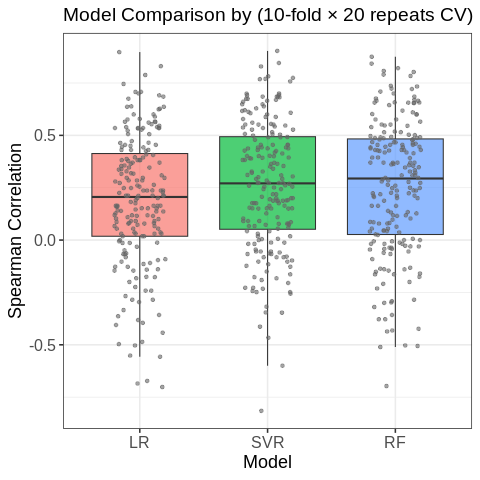

In [ ]:
%%R
# test 1
evaluate_models_cv(abmat_filtered, enmat_p_filtered, 1, metric = "correlation")

$plot

$summary_table
  Method      Mean        SD       Min        Q1    Median       Q3      Max
1     LR 1.5375251 0.4586811 0.7310551 1.2560017 1.4395596 1.763761 3.561301
2    SVR 0.9389528 0.1523974 0.5111031 0.8164799 0.9498411 1.045535 1.319828
3     RF 0.9426720 0.1365014 0.6055386 0.8343108 0.9506353 1.039682 1.253376



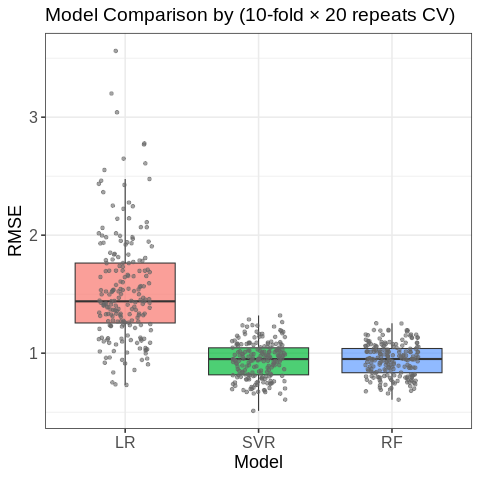

In [ ]:
%%R
# test 2
evaluate_models_cv(abmat_filtered, enmat_p_filtered, 1, metric = "rmse")

## ELA based data analysis

### Model fitting

説明

In [ ]:
'''
%%R
set.seed(42)
list[bp,allresults] <-Findbp(ocmat_filtered, enmat = enmat_fastscore_filtered, ssize = 0.75, we = c(0.00001), totalit = 1000,
    lmd = seq(1.6, 3.2, 0.2), rep = 256, intv = 10,
    threads = 64, runadamW = TRUE, sparse = TRUE, fastfitting = FALSE)
'''

'\n%%R\nset.seed(42)\nlist[bp,allresults] <-Findbp(ocmat_filtered, enmat = enmat_fastscore_filtered, ssize = 0.75, we = c(0.00001), totalit = 1000,\n    lmd = seq(1.6, 3.2, 0.2), rep = 256, intv = 10,\n    threads = 64, runadamW = TRUE, sparse = TRUE, fastfitting = FALSE)\n'

In [ ]:
%%R
#saveRDS(bp, file = "ela_fast/bp_051425.rds")
#saveRDS(allresults, file = "ela_fast/allresults_051425.rds")
bp <- readRDS("ela_fast/bp_051425.rds")
allresults <- readRDS("ela_fast/allresults_051425.rds")

In [ ]:
%%R
plotSAtest2 <- function (sa_results)
{
    res_serials_melt <- as.data.frame(sa_results[[1]]) %>% rownames_to_column("rowname") %>%
        gather(key = "timepoint", value = "value", -rowname)
    res_serials_melt$timepoint <- as.numeric(res_serials_melt$timepoint)
    summary_df <- res_serials_melt
    summary_df$id <- names(sa_results)[1]
    for (i in 2:length(sa_results)) {
        res_serials_melt <- as.data.frame(sa_results[[i]]) %>%
            rownames_to_column("rowname") %>% gather(key = "timepoint",
            value = "value", -rowname)
        res_serials_melt$timepoint <- as.numeric(res_serials_melt$timepoint)
        results_i <- res_serials_melt
        results_i$id <- names(allresults)[i]
        summary_df <- rbind(summary_df, results_i)
    }
    summary_mean <- summary_df %>% group_by(id, timepoint) %>%
        summarise(n = length(value), mean = mean(value), sd = sd(value)) %>%
        mutate(sem = sd/sqrt(n - 1), CI_lower = mean + qt((1 -
            0.95)/2, n - 1) * sem, CI_upper = mean - qt((1 -
            0.95)/2, n - 1) * sem)
    timepoints = sort(unique(summary_mean$timepoint))
    ymax = max(summary_mean$CI_upper, na.rm = TRUE) * 1.1
    ymin = min(summary_mean$CI_lower, na.rm = TRUE) * 0.9
    ggplot(summary_mean, aes(x = timepoint, y = mean, color = id)) +
        geom_line(aes(x = timepoint, y = mean, color = id)) +
        geom_ribbon(aes(ymin = CI_lower, ymax = CI_upper, fill = id),
            color = "grey70", alpha = 0.4) + scale_y_continuous(limits = c(ymin,
        ymax))
}

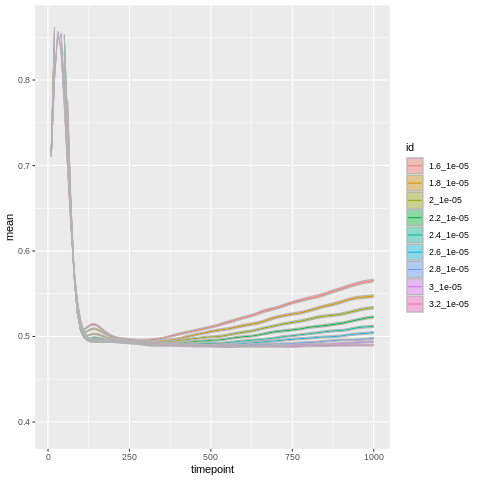

In [ ]:
%%R
plotSAtest(allresults)

Here, "id" corresponds to the tested parameter sets (lambda, we), which are key hyper parameters for Sparse matrix and adamW. The results explain lambda should be set to high for preventing overfitting in the optimization.

In [ ]:
%%R
bp

$`3_1e-05_560`
[1] 0.4880848

$`3.2_1e-05_740`
[1] 0.4881305

$`3_1e-05_550`
[1] 0.4881421

$`3.2_1e-05_750`
[1] 0.4881478

$`3_1e-05_570`
[1] 0.4881594



In [ ]:
%%R
# Then use the parameter set giving the best fitted result
list[lmd,we,totalit] <- as.numeric(unlist(strsplit(names(bp)[1], split = "_")))
print(lmd)
print(we)
print(totalit)

[1] 3
[1] 1e-05
[1] 560


In [ ]:
'''
%%R
set.seed(123)

# Then use the parameter set giving the best fitted result
list[lmd,we,totalit] <- as.numeric(unlist(strsplit(names(bp)[1], split = "_")))

#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)
sa <- runSA(ocmat_filtered, enmat = enmat_fastscore_filtered, rep = 128, threads=64, getall=FALSE, intv=10,
            totalit=totalit,lambda = lmd, we = we)
'''

'\n%%R\nset.seed(123)\n\n# Then use the parameter set giving the best fitted result\nlist[lmd,we,totalit] <- as.numeric(unlist(strsplit(names(bp)[1], split = "_")))\n\n#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)\nsa <- runSA(ocmat_filtered, enmat = enmat_fastscore_filtered, rep = 128, threads=64, getall=FALSE, intv=10,\n            totalit=totalit,lambda = lmd, we = we)\n'

In [ ]:
%%R
#saveRDS(sa, file = "ela_fast/sa_051425.rds")
sa <- readRDS("ela_fast/sa_051425.rds")

In [ ]:
#'''
# !!! not used !!!
#%%R
#sa.i.list <- foreach(seq(256)) %do% {
#    nsamples <- length(ocmat_filtered[,1])
#    random_indices <- sample(seq(1, nsamples), nsamples, replace = TRUE)
#
#    ocmat_filtered_s <- ocmat_filtered[random_indices, , drop = FALSE]
#    enmat_fastscore_filtered_s <- enmat_fastscore_filtered[random_indices, , drop = FALSE]
#
#    # rename
#    original_row_names <- rownames(ocmat_filtered_s)
#    new_row_names <- paste0(original_row_names, ".", ave(seq_along(original_row_names), original_row_names, FUN = seq_along))
#    rownames(ocmat_filtered_s) <- new_row_names
#    rownames(enmat_fastscore_filtered_s) <- new_row_names
#
#    rsa <- runSA(ocmat_filtered_s, enmat = enmat_fastscore_filtered_s, rep = 128, threads=64, getall=FALSE, intv=10,
#                totalit=totalit,lambda = lmd, we = we, reporting=FALSE)
#    rsa[[1]]
#}
#'''

In [ ]:
'''
%%R
# This function repeats SA to obtain the error range. Execution may take a long time. Use with caution.
sa.i.list <- foreach(seq(256)) %do% {
    rsa <- runSA(ocmat_filtered, enmat = enmat_fastscore_filtered, rep = 128, threads=64, getall=FALSE, intv=10,
                totalit=totalit,lambda = lmd, we = we, reporting=FALSE)
    rsa[[1]]
}
'''

'\n%%R\n# This function repeats SA to obtain the error range. Execution may take a long time. Use with caution.\nsa.i.list <- foreach(seq(256)) %do% {\n    rsa <- runSA(ocmat_filtered, enmat = enmat_fastscore_filtered, rep = 128, threads=64, getall=FALSE, intv=10,\n                totalit=totalit,lambda = lmd, we = we, reporting=FALSE)\n    rsa[[1]]\n}\n'

In [ ]:
%%R
#saveRDS(sa.i.list, file = "ela_fast/sa.i.list_051425.rds")
sa.i.list <- readRDS("ela_fast/sa.i.list_051425.rds")

In [ ]:
%%R
# Theese parameters are the same except for hge. hge0 corresponds to FAST_score=0, and hge1 corresponds to FAST_score=1.
list[he0,je0,ge0,hge0] <- sa2params(sa,0)
list[he1,je1,ge1,hge1] <- sa2params(sa,1)

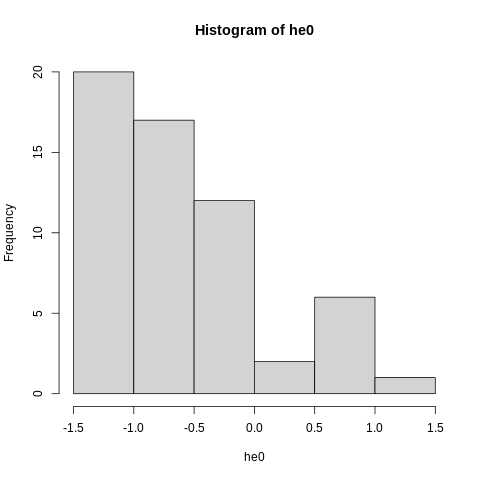

In [ ]:
%%R
hist(he0)

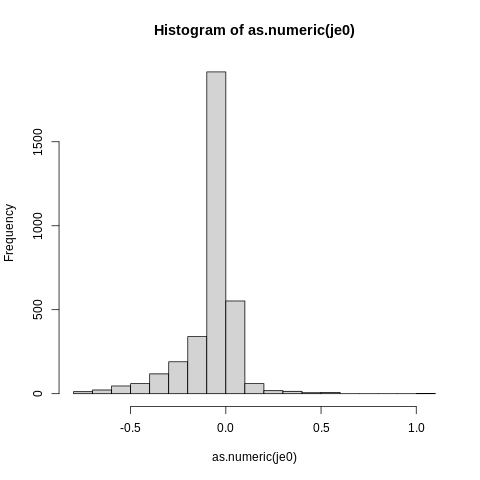

In [ ]:
%%R
hist(as.numeric(je0))

### Energy landscape analysis

In [ ]:
'''
%%R
gela <- GradELA(sa=sa, eid="FAST_score", # Specify the label or position of an environmental factor
  enmat=enmat_fastscore_filtered, env=NULL, range=c(-2., 2.), steps=32, th=0.2, threads=16) #[[1]]: return value of ELA function for each step, [[2]]: value of environmental factor for each step, [[3]]: specified environmental factor
'''

'\n%%R\ngela <- GradELA(sa=sa, eid="FAST_score", # Specify the label or position of an environmental factor\n  enmat=enmat_fastscore_filtered, env=NULL, range=c(-2., 2.), steps=32, th=0.2, threads=16) #[[1]]: return value of ELA function for each step, [[2]]: value of environmental factor for each step, [[3]]: specified environmental factor\n'

In [ ]:
'''
%%R
gstab <- gStability(sa=sa, ocmat=ocmat_filtered, enmat = enmat_fastscore_filtered, th=0.2, threads=64, reporting=TRUE)
'''

'\n%%R\ngstab <- gStability(sa=sa, ocmat=ocmat_filtered, enmat = enmat_fastscore_filtered, th=0.2, threads=64, reporting=TRUE)\n'

In [ ]:
%%R
#saveRDS(gela, file = "ela_fast/gela_051425.rds")
#saveRDS(gstab, file = "ela_fast/gstab_051425.rds")
gela <- readRDS("ela_fast/gela_051425.rds")
gstab <- readRDS("ela_fast/gstab_051425.rds")

In [ ]:
%%R
library(reshape2)

showSSD2 <- function(gela, sa, grouping = FALSE, min_group_size = 1, min_distance = 1, plot = TRUE, xlab=NULL) {
  gf <- NULL
  nspecies <- length(sa[[1]][,1])
  factor <- gela[[2]]
  mem <- foreach(i = gela[[1]]) %do% { i[[1]][[1]] }
  uqss <- unique(unlist(mem))
  memen <- foreach(i = gela[[1]]) %do% { i[[1]][[2]] }
  minen <- min(unlist(memen))
  maxen <- max(unlist(memen))
  cols <- rep(brewer.pal(32, "Set1"), times = 100)
  yrange <- c(minen - abs(0.05 * minen), maxen + abs(0.05 * maxen))

  if (plot) par(xpd = TRUE, mar = c(6, 6, 3, 6), xpd = NA)

  cex.lab <- 1.4
  cex.axis <- 1.2
  cex.legend <- 1.2

  if (!grouping) {
    cc <- 0
    foreach(j = uqss) %do% {
      cc <- cc + 1
      po <- foreach(i = gela[[1]]) %do% {
        pp <- which(i[[1]][[1]] == j)
        if (identical(pp, integer(0))) NA else i[[1]][[2]][[pp]]
      }
      energy <- unlist(po)
      if (plot) {
        par(new = TRUE)
        if (cc == 1) {
          env <- gela[[3]]
          plot(factor, energy, type = "o", ylim = yrange, col = cols[cc],
               xlab = names(env[is.na(env)]), ylab = "Energy",
               cex.lab = cex.lab, cex.axis = cex.axis)
          grid(col = "gray80", lty = "dotted")
        } else {
          plot(factor, energy, type = "o", ylim = yrange, ann = FALSE,
               col = cols[cc], cex.axis = cex.axis)
        }
      }
    }
    if (plot) {
      legend(par()$usr[2] + 0.2, par()$usr[4], legend = uqss, col = cols,
             pch = 1, lty = 1, cex = cex.legend)
    }
  } else {
    # Grouped version
    stats <- foreach(j = uqss) %do% {
      po <- foreach(i = gela[[1]]) %do% {
        pp <- which(i[[1]][[1]] == j)
        if (identical(pp, integer(0))) NA else i[[1]][[2]][[pp]]
      }
      bing <- id2bin(j, nspecies)
      energy <- unlist(po)
      list(bing, energy)
    }
    gf <- group_fragments(stats, min_group_size, min_distance)
    merged_energy_list <- lapply(gf, merge_energy_vectors)

    # Symbol styles
    pch_set <- c(1, 16, 4, 2, 15)  # ○ ● × △ ■
    cc <- 0
    legend_labels <- c()
    legend_cols <- c()
    legend_pchs <- c()

    for (g in seq_along(gf)) {
      sublist <- gf[[g]]
      for (subg in seq_along(sublist)) {
        cc <- cc + 1
        energy <- sublist[[subg]][[2]]
        col_idx <- g
        pch_idx <- pch_set[(subg - 1) %% length(pch_set) + 1]
        if (plot) {
          par(new = TRUE)
          if (cc == 1) {
            env <- gela[[3]]
            if(is.null(xlab)){xlab=names(env[is.na(env)])}
            plot(factor, energy, type = "o", ylim = yrange, col = cols[col_idx],
                 pch = pch_idx, xlab = xlab, ylab = "Energy",
                 cex.lab = cex.lab, cex.axis = cex.axis)
            grid(col = "gray80", lty = "dotted")
          } else {
            plot(factor, energy, type = "o", ylim = yrange, ann = FALSE,
                 col = cols[col_idx], pch = pch_idx, cex.axis = cex.axis)
          }
        }
        # Record legend info
        legend_labels <- c(legend_labels, paste0("C", g, ".", subg))
        legend_cols <- c(legend_cols, cols[col_idx])
        legend_pchs <- c(legend_pchs, pch_idx)
      }
    }

    if (plot) {
      legend(par()$usr[2] + 0.2, par()$usr[4], legend = legend_labels,
             col = legend_cols, pch = legend_pchs, lty = 1, cex = cex.legend)
    }
  }

  return(gf)
}



# Function to compute Hamming distance between two binary vectors
hamming_dist <- function(x, y) {
  sum(x != y)
}

# Get the range of non-NA indices
na_range <- function(v) {
  inds <- which(!is.na(v))
  if (length(inds) == 0) return(NULL)
  return(range(inds))
}

# Check if two energy sequences are consecutive and non-overlapping
is_consecutive <- function(en1, en2, ecrit) {
    range1 <- na_range(en1)
    range2 <- na_range(en2)
  if (is.null(range1) || is.null(range2)) return(FALSE)
  return(range2[1] - range1[length(range1)] == 1 & abs(en1[range1[length(range1)]] - en2[range2[1]]) < ecrit )
}

# Main grouping function
group_fragments <- function(parent_list, min_group_size=1, min_distance =1) {
  result <- list()
  the <- 1.2 * max_consecutive_diff(parent_list)

  while (length(parent_list) > 0) {
    # Initialize with the first list as the reference
    current <- parent_list[[1]]
    parent_list <- parent_list[-1]
    group <- list(current)
    current_bin <- current[[1]]
    current_en <- current[[2]]

    i <- 1
    while (i <= length(parent_list)) {
      candidate <- parent_list[[i]]
      candidate_bin <- candidate[[1]]
      candidate_en <- candidate[[2]]

      # Check for match by Hamming distance and consecutive NA-free range
      if (hamming_dist(current_bin, candidate_bin) <= min_distance &&
          is_consecutive(current_en, candidate_en, the)) {
        # Append candidate to group and update reference
        group <- append(group, list(candidate))
        current <- candidate
        current_bin <- current[[1]]
        current_en <- current[[2]]
        parent_list <- parent_list[-i]
        i <- 1  # Restart loop from beginning
      } else {
        i <- i + 1
      }
    }

    # Add completed group to the result
    len_group <- sum(unlist(lapply(group, function(x) {length(x[[2]][!is.na(x[[2]])])})))
    if (len_group >= min_group_size) {
    result <- append(result, list(group))
    }
  }

  return(reorder_group_list(result, the))
}

max_consecutive_diff <- function(stats) {
  max_diffs <- sapply(stats, function(entry) {
    values <- entry[[2]]

    # Remove NA
    values <- values[!is.na(values)]

    # If less than 2 valid entries, skip
    if (length(values) < 2) return(NA)

    # Compute absolute differences between consecutive values
    diffs <- abs(diff(values))

    # Return max difference
    max(diffs)
  })

  # Return the overall maximum, ignoring NAs
  max(max_diffs, na.rm = TRUE)
}

reorder_group_list <- function(group_list, ecrit = 0.1) {
  # Preprocessing: sort by starting position and length of energy series
  ordering_info <- lapply(group_list, function(g) {
    energy_a <- g[[1]][[2]]
    range_a <- na_range(energy_a)
    energy_z <- g[[length(g)]][[2]]
    range_z <- na_range(energy_z)
    if (is.null(range)) return(c(Inf, -Inf))  # Place invalid energy series at the end
    return(c(range_a[1], range_z[length(range_z)] - range_a[1] +1))
  })

  # Get sorting index: ascending by start position, descending by length
  ordering_matrix <- do.call(rbind, ordering_info)
  ordering_index <- order(ordering_matrix[, 1], -ordering_matrix[, 2])
  group_list <- group_list[ordering_index]

  # Main reordering process using is_consecutive rule
  n <- length(group_list)
  if(n>1){
  for (i in 1:(n - 1)) {
    ref_energy <- group_list[[i]][[length(group_list[[i]])]][[2]]
    for (j in (i + 1):n) {
      test_energy <- group_list[[j]][[1]][[2]]
      if (is_consecutive(ref_energy, test_energy, ecrit)) {
        moving <- group_list[[j]]
        group_list <- append(group_list[-j], list(moving), after = i)
        break
      }
    }
  }}

  return(group_list)
}

merge_energy_vectors <- function(gf_list) {
  # Extract the second element (energy vector) from each sublist and combine them into a matrix
  energy_mat <- do.call(rbind, lapply(gf_list, function(x) x[[2]]))

  # For each column (position), take the maximum value among non-NA entries
  merged <- apply(energy_mat, 2, function(col) {
    vals <- col[!is.na(col)]  # Remove NA values
    if (length(vals) == 0) NA else max(vals)  # Return NA if no valid values; otherwise, return the max
  })

  return(merged)
}

########################################
library(ggplot2)
library(reshape2)
library(stringr)  # for str_extract

ss_group_plot <- function(ssd_grouping, order=NULL) {
  # Convert each group's binary vectors into a matrix (transpose to get taxa as rows)
  mats <- lapply(ssd_grouping, function(y) t(do.call(rbind, unique(lapply(y, function(x) x[[1]])))))

  # Assign column names like "C1.1", "C1.2", etc., based on group and column order
  for (i in seq_along(mats)) {
    mat <- mats[[i]]
    colnames(mat) <- paste0("C", i, ".", seq_len(ncol(mat)))
    mats[[i]] <- mat
  }

  # Combine all matrices column-wise
  combined_mats <- do.call(cbind, mats)

  # Assign row names using the original taxa names
  rownames(combined_mats) <- colnames(ocmat)
  if(!is.null(order)) combined_mats <- combined_mats[order,]

  # Remove taxa (rows) with all zero values
  ss.tab <- combined_mats[rowSums(combined_mats) > 0, , drop = FALSE]

  # Convert matrix to long format for ggplot
  df <- reshape2::melt(ss.tab)

  # Extract group number from column names (e.g., from "C1.2" get "1")
  df$group <- stringr::str_extract(df$Var2, "(?<=C)\\d+")

  # Set fill color: black for value == 0, otherwise use group ID
  df$fill_color <- ifelse(df$value == 0, "black", df$group)

  # Define color palette for groups (non-black)
  group_levels <- sort(unique(df$group))
  palette <- RColorBrewer::brewer.pal(max(length(group_levels), 3), "Set1")
  names(palette) <- group_levels

  # Add black color for 0 values
  palette <- c(black = "black", palette)

  # Create tile plot with right-side y-axis labels
  ggplot(df, aes(x = Var2, y = Var1)) +
    geom_tile(aes(fill = fill_color), color = "black") +
    scale_fill_manual(values = palette, guide = "none") +
    theme_minimal() +
    labs(x = "Community composition", y = NULL) +
    scale_y_discrete(limits = unique(df$Var1), position = "right") +
    scale_x_discrete(limits = unique(df$Var2), position = "top") +
    theme(
      axis.title.x = element_text(size = 12),
      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12),
      axis.text.y.right = element_text(angle = 0, hjust = 0, size = 12),
      axis.text.y.left = element_blank(),
      axis.ticks.y.left = element_blank(),
      axis.title.y = element_blank()
    )
}

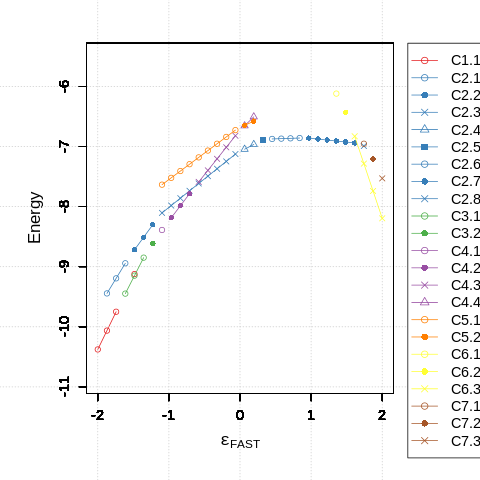

In [ ]:
%%R
# Stable state diagram
ssd_grouping <- showSSD2(gela, sa, grouping=TRUE, min_group_size=3, min_distance=3, xlab=expression(epsilon[FAST]))

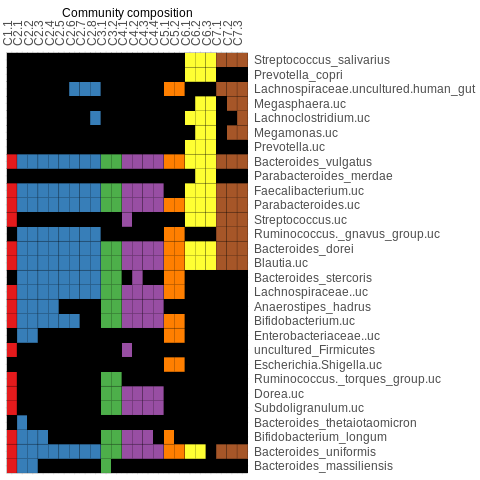

In [ ]:
%%R
ss_group_plot(ssd_grouping, order=order(ge0))

In [ ]:
%%R
# vlist: A list of binary vectors to check
# groups: A nested list of grouped compositions (each group may contain multiple subgroups)
find_matching_groups <- function(vlist, groups) {
  result <- integer(length(vlist))  # Initialize result vector

  for (i in seq_along(vlist)) {
    target <- vlist[[i]]           # The vector to be matched
    matched <- FALSE
    for (g in seq_along(groups)) {
      group <- groups[[g]]
      # Extract only the first element (binary vector) from each subgroup
      first_elements <- lapply(group, function(x) x[[1]])
      for (ref in first_elements) {
        # Check if the vector matches in both length and content
        if (length(target) == length(ref) && all(target == ref)) {
          result[i] <- g           # Assign the group number
          matched <- TRUE
          break
        }
      }
      if (matched) break           # Exit once a match is found
    }
    if (!matched) result[i] <- 0   # If no match, return 0
  }
  return(result)
}

find_matching_groups_fine <- function(vlist, groups) {
  result <- character(length(vlist))  # Initialize character vector

  for (i in seq_along(vlist)) {
    target <- vlist[[i]]
    matched <- FALSE

    for (g in seq_along(groups)) {
      group <- groups[[g]]

      for (subg in seq_along(group)) {
        ref <- group[[subg]][[1]]

        if (length(target) == length(ref) && all(target == ref)) {
          result[i] <- paste0(g, ".", subg)  # Store as "group.subgroup"
          matched <- TRUE
          break
        }
      }
      if (matched) break
    }

    if (!matched) result[i] <- "0"  # If no match, return "0"
  }

  return(result)
}

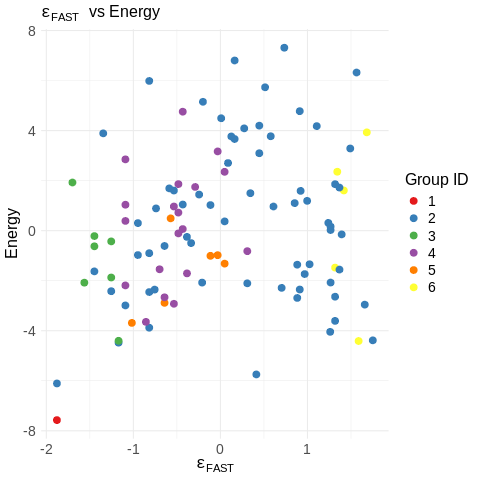

In [ ]:
%%R

# realized community composition > basin ss > group id
ssid.bin <- lapply(gstab[[1]]$stable.state.id, function(x) {id2bin(x,length(ocmat_filtered[1,]))})
ss.group.id <- find_matching_groups(ssid.bin, ssd_grouping)

# Create a data frame with FAST scores, energy values, and group IDs
df <- data.frame(
  FAST = enmat_fastscore_filtered[, 1],       # Column of FAST scores
  energy = gstab[[1]][, 4],                   # Column of energy values
  ss.group.id = as.factor(ss.group.id)       # Convert group IDs to factors for coloring
)

# Prepare group levels, treating 0 separately
group_levels <- sort(unique(ss.group.id))
set1_levels <- group_levels[group_levels != 0]

# Set color palette: 0 -> gray, others -> Set1
palette <- c("0" = "gray", setNames(
  RColorBrewer::brewer.pal(max(length(set1_levels), 3), "Set1"),
  set1_levels
))

ggplot(df, aes(x = FAST, y = energy, color = ss.group.id)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(
    title = expression(epsilon[FAST] ~ "vs Energy"),  #
    x = expression(epsilon[FAST]),                   #
    y = "Energy",
    color = "Group ID"
  ) +
  scale_color_manual(values = palette) +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),          #
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

In [ ]:
%%R
packageVersion("gtable")

[1] ‘0.3.3’


In [ ]:
%%R
#detach("package:rELA",unload=TRUE)
#remove.packages("rELA")
remove.packages("gtable")

In [ ]:
%%R
install.packages("patchwork")
install.packages("gtable")

In [ ]:
%%R
library(ggplot2)
library(purrr)
library(patchwork)
library(gtable)


get_energy_error_range <- function(oc, e){
    # need to get sa.i.list first
    len.h.g <- length(e)+1
    energy_vec <- sapply(sa.i.list, function(sa.ip) {
  Energy(oc, sa.ip[,1] + sa.ip[,seq(2,len.h.g)] %*% e, sa.ip[,-seq(len.h.g)])
  })
    return(#t.test(energy_vec)$conf.int
           quantile(energy_vec, probs = c(0.025, 0.975), na.rm = TRUE)
           )
}


plotDG_grid <- function(gela, ocmat, ssd_grouping, env_vectors, ncol = NULL, errorbar = FALSE) {
  s <- ncol(ocmat)
  e.vec <- matrix(gela[[3]], ncol=1)
  g_label <-  names(gela[[3]][is.na(gela[[3]])])

  # Step 1: Precompute global y-axis (energy) range
  energy_range <- map(env_vectors, function(x) {
    ela <- gela[[1]][[x]][[1]]
    if (length(ela[[1]]) > 1) {
      e2 <- unlist(ela[[2]])
      ue4 <- unlist(ela[[4]])
      e4 <- ue4[is.finite(ue4)]
      c(e2, e4)
    } else {
      e2 <- unlist(ela[[2]])
      e2[is.finite(e2)]
    }
  }) %>%
    unlist() %>%
    range(na.rm = TRUE)

  energy_range <- energy_range + c(-1, 0)

  # Step 2: Generate list of ggplot objects
  plots <- map(env_vectors, function(x) {
    ela <- gela[[1]][[x]][[1]]
    label <- paste(g_label, "=", round(gela[[2]][x], 2))

    if (length(ela[[1]]) > 1) {
      grobj <- GraphObj(ela)
      grobj_pre <- grobj
      grobj_pre$len_cee <- map_int(grobj_pre$cee, length)

      grobj_ <- cbind(
        grobj_pre,
        do.call(cbind, map(grobj_pre$point, ~id2bin(.x, s))) %>% t()
      )

      grobj_to_plot <- data.frame()
      if (nrow(grobj_) != 1) {
        for (i in 1:nrow(grobj_)) {
          aa <- grobj_[i, ]
          id.label <- find_matching_groups_fine(list(id2bin(aa$point, s)), ssd_grouping)
          if(errorbar){e.vec.i <- replace(e.vec, is.na(e.vec), gela[[2]][x])
              errange <- get_energy_error_range(id2bin(aa$point, s), e.vec.i)}
          aa$point_str <- if (id.label != 0) paste0("C", id.label) else ""

          bb_pre <- grobj_[map_lgl(grobj_$cee, function(x) all(unlist(aa$cee) %in% unlist(x))), ]
          bb <- bb_pre[bb_pre$ccc_str != aa$ccc_str, ][1, ]
          bb$point_str <- ""

          between_aa_bb <- aa
          between_aa_bb$energy <- bb$energy
          between_aa_bb$point_str <- ""

          line_break <- between_aa_bb
          line_break$nodes2xposi <- NA
          line_break$energy <- NA
          line_break$point_str <- ""

          # Combine all
          grobj_to_plot_ <- rbind(aa, between_aa_bb, bb, line_break)
          grobj_to_plot_$id <- i

          # Optional errorbar info (only for labeled points)
          if (errorbar) {
            grobj_to_plot_$ymin <- NA
            grobj_to_plot_$ymax <- NA
            grobj_to_plot_$x_offset <- NA
            labeled_idx <- grobj_to_plot_$point_str != ""
            grobj_to_plot_$ymin[labeled_idx] <- errange[1]
            grobj_to_plot_$ymax[labeled_idx] <- errange[2]
            grobj_to_plot_$x_offset[labeled_idx] <- grobj_to_plot_$nodes2xposi[labeled_idx] + 0.02
          }

          grobj_to_plot <- rbind(grobj_to_plot, grobj_to_plot_)
        }
      }

      # Add error bars (dummy ±0.5 unless you replace with real SD/CI)
      if (errorbar) {
        grobj_to_plot_with_labels <- subset(grobj_to_plot, point_str != "")
        grobj_to_plot_with_labels$x_offset <- grobj_to_plot_with_labels$nodes2xposi + 0.02
      }

      xvals <- grobj_to_plot$nodes2xposi
      x_range <- range(xvals, na.rm = TRUE)
      x_limits <- c(floor(x_range[1]) - 0.25, ceiling(x_range[2]) + 0.25)

      g <- ggplot(grobj_to_plot, aes(x = nodes2xposi, y = energy, label = point_str))

      if (errorbar) {
        g <- g + geom_errorbar(data = grobj_to_plot_with_labels,
                         aes(x = x_offset, ymin = ymin, ymax = ymax),
                         width = 0.2, color = "red")
      }

      g <- g +
        geom_point() +
        geom_path() +
        geom_text(hjust = 0.75, vjust = 2, aes(fontface = 2)) +
        ylim(energy_range) +
        xlim(x_limits) +
        labs(title = label, x = NULL, y = "Energy") +
        theme_minimal()

      return(g)
    } else {
      id.label <- find_matching_groups_fine(list(id2bin(ela[[1]][1], s)), ssd_grouping)
      if(errorbar){e.vec.i <- replace(e.vec, is.na(e.vec), gela[[2]][x])
          errange <- get_energy_error_range(id2bin(ela[[1]][1], s), e.vec.i)}
      point_label <- paste0("C", id.label)
      e2 <- unlist(ela[[2]])
      energy_val <- e2[is.finite(e2)][1]

      df <- data.frame(x = 1, y = energy_val, point_label)

      g <- ggplot(df, aes(x = x, y = y, label = point_label)) +
        geom_point(size = 3) +
        geom_text(hjust = 0.75, vjust = 2, aes(fontface = 2)) +
        ylim(energy_range) +
        xlim(0.5, 1.5) +
        labs(title = label, x = NULL, y = "Energy") +
        theme_minimal()

      if (errorbar) {
        df$ymin <- errange[1]
        df$ymax <- errange[2]
        df$x_offset <- df$x + 0.02
        g <- g + geom_errorbar(data = df,
                         aes(x = x_offset, ymin = ymin, ymax = ymax),
                         width = 0.2, color = "red")
      }

      return(g)
    }
  })

  # Step 3: Combine plots
  if (is.null(ncol)) ncol <- ceiling(sqrt(length(plots)))
  wrap_plots(plots, ncol = ncol)
}

find_matching_groups_fine <- function(vlist, groups) {
  result <- character(length(vlist))  # Initialize character vector

  for (i in seq_along(vlist)) {
    target <- vlist[[i]]
    matched <- FALSE

    for (g in seq_along(groups)) {
      group <- groups[[g]]

      for (subg in seq_along(group)) {
        ref <- group[[subg]][[1]]

        if (length(target) == length(ref) && all(target == ref)) {
          result[i] <- paste0(g, ".", subg)  # Store as "group.subgroup"
          matched <- TRUE
          break
        }
      }
      if (matched) break
    }

    if (!matched) result[i] <- "0"  # If no match, return "0"
  }

  return(result)
}


Error: package or namespace load failed for ‘patchwork’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘gtable’ 0.3.3 is already loaded, but >= 0.3.6 is required


RInterpreterError: Failed to parse and evaluate line 'library(ggplot2)\nlibrary(purrr)\nlibrary(patchwork)\nlibrary(gtable)\n\n\nget_energy_error_range <- function(oc, e){\n    # need to get sa.i.list first\n    len.h.g <- length(e)+1\n    energy_vec <- sapply(sa.i.list, function(sa.ip) {\n  Energy(oc, sa.ip[,1] + sa.ip[,seq(2,len.h.g)] %*% e, sa.ip[,-seq(len.h.g)])\n  })\n    return(#t.test(energy_vec)$conf.int\n           quantile(energy_vec, probs = c(0.025, 0.975), na.rm = TRUE)\n           )\n}\n\n\nplotDG_grid <- function(gela, ocmat, ssd_grouping, env_vectors, ncol = NULL, errorbar = FALSE) {\n  s <- ncol(ocmat)\n  e.vec <- matrix(gela[[3]], ncol=1)\n  g_label <-  names(gela[[3]][is.na(gela[[3]])])\n\n  # Step 1: Precompute global y-axis (energy) range\n  energy_range <- map(env_vectors, function(x) {\n    ela <- gela[[1]][[x]][[1]]\n    if (length(ela[[1]]) > 1) {\n      e2 <- unlist(ela[[2]])\n      ue4 <- unlist(ela[[4]])\n      e4 <- ue4[is.finite(ue4)]\n      c(e2, e4)\n    } else {\n      e2 <- unlist(ela[[2]])\n      e2[is.finite(e2)]\n    }\n  }) %>%\n    unlist() %>%\n    range(na.rm = TRUE)\n\n  energy_range <- energy_range + c(-1, 0)\n\n  # Step 2: Generate list of ggplot objects\n  plots <- map(env_vectors, function(x) {\n    ela <- gela[[1]][[x]][[1]]\n    label <- paste(g_label, "=", round(gela[[2]][x], 2))\n\n    if (length(ela[[1]]) > 1) {\n      grobj <- GraphObj(ela)\n      grobj_pre <- grobj\n      grobj_pre$len_cee <- map_int(grobj_pre$cee, length)\n\n      grobj_ <- cbind(\n        grobj_pre,\n        do.call(cbind, map(grobj_pre$point, ~id2bin(.x, s))) %>% t()\n      )\n\n      grobj_to_plot <- data.frame()\n      if (nrow(grobj_) != 1) {\n        for (i in 1:nrow(grobj_)) {\n          aa <- grobj_[i, ]\n          id.label <- find_matching_groups_fine(list(id2bin(aa$point, s)), ssd_grouping)\n          if(errorbar){e.vec.i <- replace(e.vec, is.na(e.vec), gela[[2]][x])\n              errange <- get_energy_error_range(id2bin(aa$point, s), e.vec.i)}\n          aa$point_str <- if (id.label != 0) paste0("C", id.label) else ""\n\n          bb_pre <- grobj_[map_lgl(grobj_$cee, function(x) all(unlist(aa$cee) %in% unlist(x))), ]\n          bb <- bb_pre[bb_pre$ccc_str != aa$ccc_str, ][1, ]\n          bb$point_str <- ""\n\n          between_aa_bb <- aa\n          between_aa_bb$energy <- bb$energy\n          between_aa_bb$point_str <- ""\n\n          line_break <- between_aa_bb\n          line_break$nodes2xposi <- NA\n          line_break$energy <- NA\n          line_break$point_str <- ""\n\n          # Combine all\n          grobj_to_plot_ <- rbind(aa, between_aa_bb, bb, line_break)\n          grobj_to_plot_$id <- i\n\n          # Optional errorbar info (only for labeled points)\n          if (errorbar) {\n            grobj_to_plot_$ymin <- NA\n            grobj_to_plot_$ymax <- NA\n            grobj_to_plot_$x_offset <- NA\n            labeled_idx <- grobj_to_plot_$point_str != ""\n            grobj_to_plot_$ymin[labeled_idx] <- errange[1]\n            grobj_to_plot_$ymax[labeled_idx] <- errange[2]\n            grobj_to_plot_$x_offset[labeled_idx] <- grobj_to_plot_$nodes2xposi[labeled_idx] + 0.02\n          }\n\n          grobj_to_plot <- rbind(grobj_to_plot, grobj_to_plot_)\n        }\n      }\n\n      # Add error bars (dummy ±0.5 unless you replace with real SD/CI)\n      if (errorbar) {\n        grobj_to_plot_with_labels <- subset(grobj_to_plot, point_str != "")\n        grobj_to_plot_with_labels$x_offset <- grobj_to_plot_with_labels$nodes2xposi + 0.02\n      }\n\n      xvals <- grobj_to_plot$nodes2xposi\n      x_range <- range(xvals, na.rm = TRUE)\n      x_limits <- c(floor(x_range[1]) - 0.25, ceiling(x_range[2]) + 0.25)\n\n      g <- ggplot(grobj_to_plot, aes(x = nodes2xposi, y = energy, label = point_str))\n\n      if (errorbar) {\n        g <- g + geom_errorbar(data = grobj_to_plot_with_labels,\n                         aes(x = x_offset, ymin = ymin, ymax = ymax),\n                         width = 0.2, color = "red")\n      }\n\n      g <- g +\n        geom_point() +\n        geom_path() +\n        geom_text(hjust = 0.75, vjust = 2, aes(fontface = 2)) +\n        ylim(energy_range) +\n        xlim(x_limits) +\n        labs(title = label, x = NULL, y = "Energy") +\n        theme_minimal()\n\n      return(g)\n    } else {\n      id.label <- find_matching_groups_fine(list(id2bin(ela[[1]][1], s)), ssd_grouping)\n      if(errorbar){e.vec.i <- replace(e.vec, is.na(e.vec), gela[[2]][x])\n          errange <- get_energy_error_range(id2bin(ela[[1]][1], s), e.vec.i)}\n      point_label <- paste0("C", id.label)\n      e2 <- unlist(ela[[2]])\n      energy_val <- e2[is.finite(e2)][1]\n\n      df <- data.frame(x = 1, y = energy_val, point_label)\n\n      g <- ggplot(df, aes(x = x, y = y, label = point_label)) +\n        geom_point(size = 3) +\n        geom_text(hjust = 0.75, vjust = 2, aes(fontface = 2)) +\n        ylim(energy_range) +\n        xlim(0.5, 1.5) +\n        labs(title = label, x = NULL, y = "Energy") +\n        theme_minimal()\n\n      if (errorbar) {\n        df$ymin <- errange[1]\n        df$ymax <- errange[2]\n        df$x_offset <- df$x + 0.02\n        g <- g + geom_errorbar(data = df,\n                         aes(x = x_offset, ymin = ymin, ymax = ymax),\n                         width = 0.2, color = "red")\n      }\n\n      return(g)\n    }\n  })\n\n  # Step 3: Combine plots\n  if (is.null(ncol)) ncol <- ceiling(sqrt(length(plots)))\n  wrap_plots(plots, ncol = ncol)\n}\n\nfind_matching_groups_fine <- function(vlist, groups) {\n  result <- character(length(vlist))  # Initialize character vector\n\n  for (i in seq_along(vlist)) {\n    target <- vlist[[i]]\n    matched <- FALSE\n\n    for (g in seq_along(groups)) {\n      group <- groups[[g]]\n\n      for (subg in seq_along(group)) {\n        ref <- group[[subg]][[1]]\n\n        if (length(target) == length(ref) && all(target == ref)) {\n          result[i] <- paste0(g, ".", subg)  # Store as "group.subgroup"\n          matched <- TRUE\n          break\n        }\n      }\n      if (matched) break\n    }\n\n    if (!matched) result[i] <- "0"  # If no match, return "0"\n  }\n\n  return(result)\n}\n'.
R error message: 'Error: package or namespace load failed for ‘patchwork’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):\n namespace ‘gtable’ 0.3.3 is already loaded, but >= 0.3.6 is required'

In [ ]:
%%R
plotDG_grid(gela, ocmat_filtered, ssd_grouping, seq(1,32,3.8), 3, errorbar=TRUE)

In [ ]:
%%R
# functions for visualizing basin size

apply_pruning_rule <- function(id.vector, mapping.matrix) {
  before <- mapping.matrix[, 1]
  after <- mapping.matrix[, 2]
  mapping <- setNames(after, before)
  replaced <- ifelse(id.vector %in% names(mapping), mapping[id.vector], id.vector)
  return(replaced)
}

relative_basin_size_df <- function(gela, sa, itr=256, threads=1){
    env.values <- gela[[2]]
    e.vec <- matrix(gela[[3]], ncol=1)
    len.h.g <- length(e.vec) + 1
    n_env <- length(env.values)
    nspecies <- length(sa[[1]][,1])


    # Initialize parallel backend
    cluster <- makeCluster(threads)
    clusterCall(cluster, function(x) .libPaths(x), .libPaths())
    registerDoParallel(cluster)
    on.exit(stopCluster(cluster))

    # Prepare output matrix
    group.index.mat <- matrix(NA, nrow = n_env, ncol = itr)

    # Export needed variables to workers
    clusterExport(cluster, c("bin2id", "id2bin", "apply_pruning_rule", "find_matching_groups",
                            "ssd_grouping"))

    # Run in parallel
    results <- foreach(i = seq_len(n_env), .packages = c("rELA", "foreach")) %dopar% {
      pruning_rule <- gela[[1]][[i]][[2]]
      e.vec.i <- replace(e.vec, is.na(e.vec), gela[[2]][i])
      h_ev <- sa[[1]][,1] + (sa[[1]][, seq(2,len.h.g)] %*% e.vec.i)
      j_ev <- sa[[1]][, -seq(1,len.h.g)]
      ss.trials <- rELA::SSestimate(h_ev, j_ev, itr)[, - (length(h_ev) + 1)]
      id_vector <- apply(ss.trials, 1, bin2id)
      ssids <- apply_pruning_rule(id_vector, pruning_rule)
      ssids.bin <- lapply(ssids, function(x) id2bin(x, nspecies))
      find_matching_groups(ssids.bin, ssd_grouping)
    }

    # Combine into matrix
    group.index.mat <- do.call(rbind, results)

    # Convert the input matrix to a data frame
    df <- as.data.frame(group.index.mat)

    # Add row numbers as a new column to identify original rows
    df <- df %>% mutate(Row = row_number())

    # Transform the data frame into long format and calculate the proportion of each value per row
    df_long <- df %>%
      pivot_longer(cols = -Row, names_to = "Col", values_to = "Value") %>%
      group_by(Row, Value) %>%
      summarise(Count = n(), .groups = "drop") %>%
      group_by(Row) %>%
      mutate(Ratio = Count / sum(Count))
    }

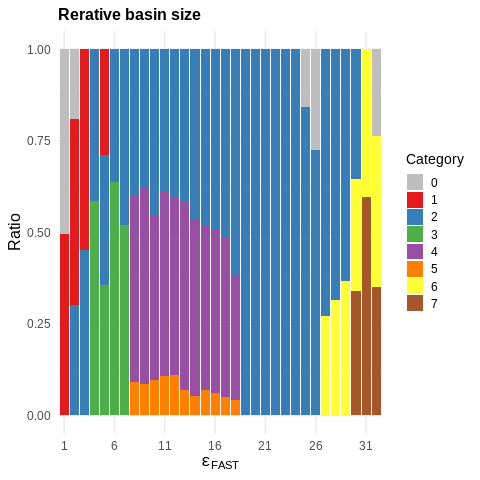

In [ ]:
%%R
# Visualization of basin size

df_long <- relative_basin_size_df(gela, sa, itr=512, threads=64)

# Set stacking order: bottom to top = 0, 1, 2, ...
levels_order <- sort(unique(df_long$Value), decreasing = FALSE)
df_long$Value <- factor(df_long$Value, levels = levels_order)

# Assign fill colors: gray for 0, Set1 for others
n_colors <- length(levels_order)
set1_colors <- brewer.pal(min(n_colors - 1, 9), "Set1")
fill_colors <- c("0" = "gray", setNames(set1_colors, levels_order[levels_order != "0"]))

env.values <- enmat_fastscore_filtered[,1]
break_indices <- seq(1, length(env.values), by = 5)
env_labels <- round(env.values, 2)

ggplot(df_long, aes(x = factor(Row), y = Ratio, fill = Value)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = fill_colors, name = "Category") +
  scale_x_discrete(
    breaks = as.character(break_indices),
    labels = env_labels[break_indices]
  ) +
  labs(
    x = expression(epsilon[FAST]),##
    y = "Ratio",
    title = "Rerative basin size"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

In [ ]:
#%%R
#gelsobj <- GELSObj(gela, sa, threads=2)

## Integrative data analysis

### Association between taxonomic groups and FAST scores

The following shows the association of each taxonomic group to the FAST_score (**g_FASTscore**). Taxonomic groups with positive (negative) values are more likely to appear in samples with high (low) FAST scores.

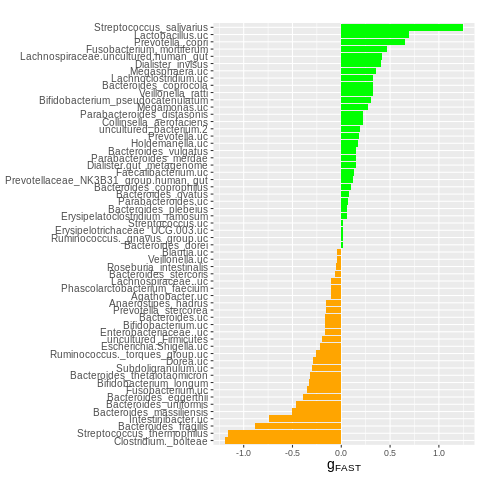

In [ ]:
%%R
data <- data.frame(ge0)

# Sort by the FAST_score column
data_sorted <- data[order(data$FAST_score, decreasing = TRUE), , drop=FALSE]
labels <- rownames(data_sorted)

# Create a bar chart
ggplot(data_sorted, aes(x = reorder(labels, FAST_score), y = FAST_score)) +
  geom_bar(stat = "identity", aes(fill = FAST_score > 0), show.legend = FALSE) +
  scale_fill_manual(values = c("orange", "green")) +  # Red for negative, blue for positive
  coord_flip() +  # Make the chart horizontal
  labs(title = "", x = NULL, y = expression("g"[FAST])) +
  theme(
    axis.text.y = element_text(size = 10),
    axis.title.y = element_text(size = 16),
    axis.title.x = element_text(size = 14),
    legend.position = "none")

Below, this result is compared with a simple correlation (Spearman's Rho) between the abundance of taxonomic groups and FAST scores ($\boldsymbol{\rho}$_FASTscore).

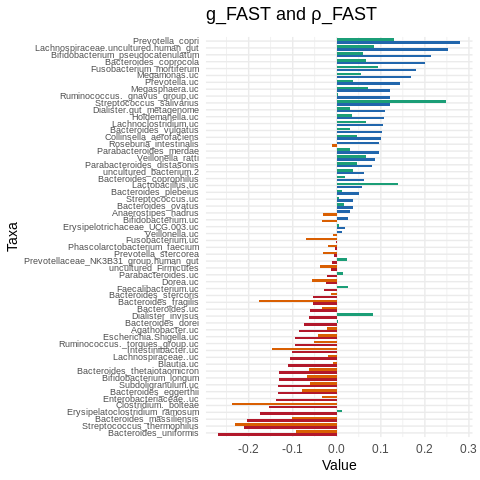

In [ ]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)

# 0. Combining g_
corr <- result$correlation_table$SpearmanRho #need to run microbiome_continuous_analysis first #
#########
ge <- ge0 / 5 ### g_FASTscore is rescaled ##
#########
combined_df <- data.frame(label = rownames(ge0), g_FASTscore = as.numeric(ge), Correlation = corr)

# 1. Sort the samples by Correlation (descending) and fix the label order (top = highest)
combined_df <- combined_df %>%
  arrange(desc(Correlation)) %>%
  mutate(label = factor(label, levels = rev(label)))

# 2. Convert to long format for ggplot2
plot_df <- combined_df %>%
  pivot_longer(cols = c(Correlation, g_FASTscore),
               names_to = "source", values_to = "value")

# 3. Set 'source' as factor and explicitly define drawing order
plot_df$source <- factor(plot_df$source, levels = c("Correlation", "g_FASTscore"))

# 4. Define color grouping by variable type and sign (positive/negative)
plot_df <- plot_df %>%
  mutate(sign = ifelse(value >= 0, "positive", "negative"),
         fill_group = interaction(source, sign))

# 5. Define manual color map (colorblind-friendly)
color_map <- c(
  "Correlation.positive" = "#2166AC",  # Blue
  "Correlation.negative" = "#B2182B",  # Red
  "g_FASTscore.positive" = "#1B9E77",  # Green
  "g_FASTscore.negative" = "#D95F02"   # Orange
)

# 6. Draw the horizontal bar plot
ggplot(plot_df, aes(x = label, y = value, fill = fill_group)) +
  geom_bar(stat = "identity",
           position = position_dodge(width = 0.8),
           width = 0.7) +
  coord_flip() +
  scale_fill_manual(values = color_map) +
  labs(title = expression("g_FAST and " * rho * "_FAST"),
       x = "Taxa", y = "Value", fill = "Variable and Sign") +
  theme_minimal(base_size = 15) +
  theme(
    axis.text.y = element_text(size = 9),
    axis.title.y = element_text(size = 14),
    axis.title.x = element_text(size = 14),
    legend.position = "none"
  )

In [ ]:
%%R
cor.test(combined_df$g_FASTscore, combined_df$Correlation, method = "spearman")


	Spearman's rank correlation rho

data:  combined_df$g_FASTscore and combined_df$Correlation
S = 6492, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8003015 



The following shows the 2D plot of g_FASTscore and Correlation

In [ ]:
%%R
install.packages("ggrepel")

`geom_smooth()` using formula = 'y ~ x'


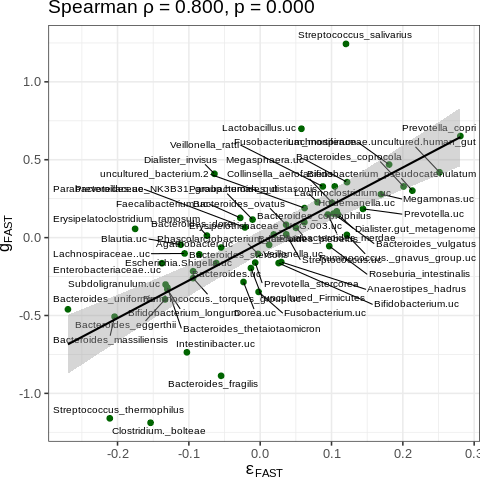

In [ ]:
%%R
library(ggrepel)

ge <- ge0

# Spearman correlation test
cor_test <- suppressWarnings(cor.test(corr, ge, method = "spearman"))
rho_val <- sprintf("%.3f", cor_test$estimate)
p_val   <- sprintf("%.3f", cor_test$p.value)

# Create data frame
corr.vs.ge_df <- data.frame(Correlation = corr, g_FAST = ge)

# Generate plot
corr.vs.ge_plot <- ggplot(corr.vs.ge_df, aes(x = Correlation, y = ge)) +
  geom_point(color = "darkgreen", size = 2.5) +
  geom_text_repel(aes(label = rownames(corr.vs.ge_df)),
                  size = 3.5, max.overlaps = 50, box.padding = 0.3) +
  geom_smooth(method = "lm", color = "black", se = TRUE) +
  labs(
    x = expression(epsilon[FAST]),
    y = expression(g[FAST]),
    title = paste0(
      "Spearman \u03C1 = ", rho_val, ", p = ", p_val
    )
  ) +
  theme_bw(base_size = 16) +
  theme(
    plot.margin = margin(0, 0, 0, 0),
    plot.title = element_text(lineheight = 1.2)
  )

# Display plot
corr.vs.ge_plot

`geom_smooth()` using formula = 'y ~ x'


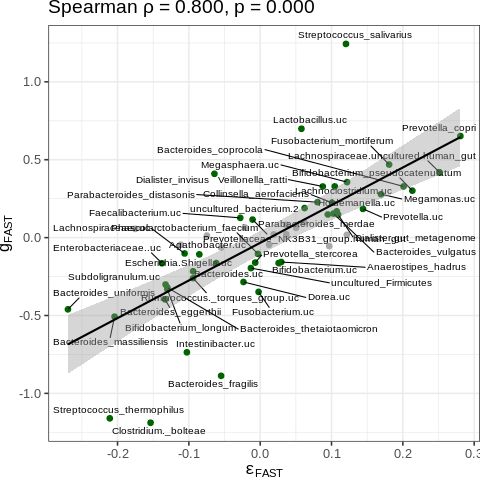

In [ ]:
%%R

# Add filtered label column to the data frame
corr.vs.ge_df$label <- ifelse(abs(corr.vs.ge_df$FAST_score) > 0.1,
                              rownames(corr.vs.ge_df), NA)

# Define point color based on label presence
corr.vs.ge_df$point_color <- ifelse(is.na(corr.vs.ge_df$label), "darkgray", "darkgreen")

# Plot
corr.vs.ge_plot <- ggplot(corr.vs.ge_df, aes(x = Correlation, y = ge)) +
  geom_point(aes(color = point_color), size = 2.5) +
  geom_text_repel(aes(label = label),
                  size = 3.5, max.overlaps = 50, box.padding = 0.3) +
  geom_smooth(method = "lm", color = "black", se = TRUE) +
  labs(
    x = expression(epsilon[FAST]),
    y = expression(g[FAST]),
    title = paste0("Spearman \u03C1 = ", rho_val, ", p = ", p_val)
  ) +
  scale_color_identity() +  # Use colors directly from 'point_color'
  theme_bw(base_size = 16) +
  theme(
    plot.margin = margin(0, 0, 0, 0),
    plot.title = element_text(lineheight = 1.2)
  )

# Display
corr.vs.ge_plot

### Netowork analysis

In [ ]:
%%R
# Assume 'mat' is a matrix
connectance <- function(mat) {
  n_possible <- prod(dim(mat))                 # Total number of possible links
  n_actual   <- sum(mat != 0, na.rm = TRUE)    # Non-zero entries = actual links
  return(n_actual / n_possible)                # Connectance = actual / possible
}

connectance(je0)

[1] 0.7996433


Next, calculate the correlation matrix from the abundance table using SparCC.

In [ ]:
%%R
# Interaction (association) network inference by sparCC (using SPIEC-EASI library)
install.packages("devtools")
devtools::install_github("zdk123/SpiecEasi", upgrade = "always")

glue      (1.6.2 -> 1.8.0  ) [CRAN]
lifecycle (1.0.3 -> 1.0.4  ) [CRAN]
cli       (3.6.1 -> 3.6.5  ) [CRAN]
shape     (NA    -> 1.4.6.1) [CRAN]
glmnet    (NA    -> 4.1-9  ) [CRAN]
VGAM      (NA    -> 1.1-13 ) [CRAN]
pulsar    (NA    -> 0.3.11 ) [CRAN]
huge      (NA    -> 1.3.5  ) [CRAN]
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpg4pO3C/remotes20912fbb88d/zdk123-SpiecEasi-5f396da/DESCRIPTION’ ... OK
* preparing ‘SpiecEasi’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘SpiecEasi/inst’
* looking to see if a ‘data/datalist’ file should be added
* building ‘SpiecEasi_1.1.3.tar.gz’



In [ ]:
%%R
library(SpiecEasi)
sparcc_res <- sparcc(abmat_filtered)
# SparCC correlation matrix
sparcc_cor_mat <- sparcc_res$Cor
colnames(sparcc_cor_mat) <- rownames(sparcc_cor_mat) <- specieslabel

In [ ]:
%%R

threshold_correlation_matrix <- function(cor_mat, X_ratio = 0.2) {
  if (!is.matrix(cor_mat)) stop("Input must be a matrix.")
  if (X_ratio  < 0 || X_ratio  > 1) stop("X_percent must be between 0 and 1.")

  cor_mat_filtered <- cor_mat

  # Flatten the matrix excluding diagonal
  upper_vals <- cor_mat[upper.tri(cor_mat)]
  lower_vals <- cor_mat[lower.tri(cor_mat)]

  # Positive values
  pos_vals <- upper_vals[upper_vals > 0]
  pos_thresh <- quantile(pos_vals, probs = X_ratio)

  # Negative values
  neg_vals <- lower_vals[lower_vals < 0]
  neg_thresh <- quantile(neg_vals, probs = 1 - X_ratio)  # closer to 0 from negative side

  # Apply thresholding
  cor_mat_filtered[cor_mat > 0 & cor_mat < pos_thresh] <- 0
  cor_mat_filtered[cor_mat < 0 & cor_mat > neg_thresh] <- 0

  return(cor_mat_filtered)
}

In [ ]:
%%R
install.packages("tibble")
install.packages("ggraph")

Visualisation of J using a circular map

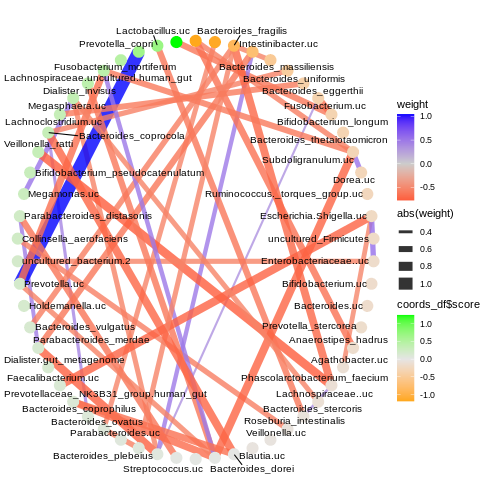

In [ ]:
%%R
library(igraph)
library(ggraph)
library(tidygraph)
library(tibble)
library(dplyr)

# 1. correlation matrix
cor_mat <- threshold_correlation_matrix(as.matrix(je0), 0.97)

# 2. edge list
edges <- which(abs(cor_mat) > 0 & upper.tri(cor_mat), arr.ind = TRUE)
edge_df <- data.frame(
  from = rownames(cor_mat)[edges[, 1]],
  to   = colnames(cor_mat)[edges[, 2]],
  weight = cor_mat[edges]
)

# 3. node score
node_score <- as.vector(ge0)
names(node_score) <- rownames(cor_mat)

# 4. sort node names by score (ascending)
sorted_nodes <- names(sort(node_score, decreasing = FALSE))

# 5. assign angles: start at 12 o'clock (pi/2), go clockwise (angle decreasing)
n <- length(sorted_nodes)
angles <- seq(pi/2, pi/2 - 2 * pi + 2 * pi / n, length.out = n)

# 6. create coordinate table
coords_df <- tibble(
  name = sorted_nodes,
  score = node_score[sorted_nodes],
  angle = angles,
  x = cos(angle),
  y = sin(angle)
)

# 7. build graph
g <- graph_from_data_frame(edge_df, vertices = coords_df$name, directed = FALSE)

# 8. plot
ggraph(g, layout = "manual", x = coords_df$x, y = coords_df$y) +
  geom_edge_link(aes(color = weight, width = abs(weight)), alpha = 0.8) +
  scale_edge_color_gradient2(low = "red", mid = "gray80", high = "blue", midpoint = 0) +
  geom_node_point(aes(color = coords_df$score), size = 5) +
  scale_color_gradient2(low = "orange", mid = "gray90", high = "green", midpoint = 0) +
  geom_node_text(aes(label = name), repel = TRUE, size = 3.5) +
  theme_void() +
  theme(plot.margin = margin(20, 0,0,0))


Below, it is tested whether the relationships between nodes with negative g_FAST values are biased toward positive relationships (J_ij > 0).

In [ ]:
%%R
# Node scores
node_score <- coords_df$score
names(node_score) <- coords_df$name

# For each edge:
edge_df$sign_match <- mapply(function(a, b, w) {
  node_a <- sign(node_score[a])
  node_b <- sign(node_score[b])
  edge_sign <- sign(w)
  score_sign <<- sign(node_a * node_b)
  return(score_sign == edge_sign && node_a == -1 && edge_sign == 1)
}, edge_df$from, edge_df$to, edge_df$weight)

# Observed match rate
observed_match_rate <- mean(edge_df$sign_match)

# Permutation test
perm_match <- replicate(1000, {
  permuted_scores <- setNames(sample(node_score), names(node_score))
  perm_match_i <- mapply(function(a, b, w) {
    sa <- sign(permuted_scores[a])
    sb <- sign(permuted_scores[b])
    es <- sign(w)
    score_sign <- sign(sa * sb)
    return(score_sign == es && sa == -1 && es == 1)
  }, edge_df$from, edge_df$to, edge_df$weight)
  mean(perm_match_i)
})

# Calculate p-value
p_value <- mean(perm_match >= observed_match_rate)
p_value


[1] 0.348


Using the Mantel test, we evaluate the similarity between the distance matrix calculated based on rho_FASTscore (g_FASTscore) and the SparCC correlation matrix (J). If this statistic is high, the SparCC correlation is strongly influenced by theassociation between abundance and FASTscore.

In [ ]:
%%R
# 1. Compute distance matrix from sample_vector (e.g., Euclidean)
# 2. Compute distance matrix from sample_mat (e.g., Bray-Curtis)
# 3. Perform Mantel test between the two distance matrices

print("rho_FASTscore and SparCC")
dist_vector <- dist(as.vector(result$correlation_table$SpearmanRho), method = "euclidean")
dist_matrix <- sparcc_cor_mat
mantel_result <- mantel(dist_vector, dist_matrix, method = "pearson", permutations = 999)
print(mantel_result)

print("g_FASTscore and j")
dist_vector <- dist(as.vector(ge0), method = "euclidean")
dist_matrix <- je0
mantel_result <- mantel(dist_vector, dist_matrix, method = "pearson", permutations = 999)
print(mantel_result)

print("SparCC and j")
dist_vector <- sparcc_cor_mat
dist_matrix <- je0
mantel_result <- mantel(dist_vector, dist_matrix, method = "pearson", permutations = 999)
print(mantel_result)

[1] "rho_FASTscore and SparCC"

Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = dist_vector, ydis = dist_matrix, method = "pearson",      permutations = 999) 

Mantel statistic r: 0.003341 
      Significance: 0.426 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0266 0.0351 0.0429 0.0480 
Permutation: free
Number of permutations: 999

[1] "g_FASTscore and j"

Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = dist_vector, ydis = dist_matrix, method = "pearson",      permutations = 999) 

Mantel statistic r: -0.09205 
      Significance: 1 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0313 0.0428 0.0516 0.0621 
Permutation: free
Number of permutations: 999

[1] "SparCC and j"

Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = dist_vector, ydis = dist_matrix, method = "pearson",      permutations = 999) 

Mantel statist

`geom_smooth()` using formula = 'y ~ x'


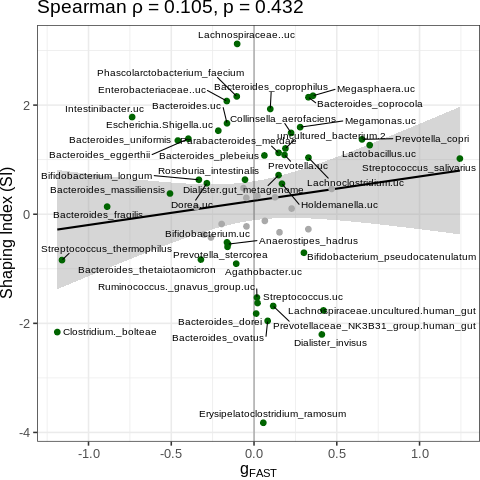

In [ ]:
%%R

J_ij <- je0
g_i <- ge0

# Compute z_i for each i
z_i <- numeric(n)
for (i in 1:n) {
  z_i[i] <- sum(J_ij[i, ] * sign(g_i[i] * g_i))  # sign(g_i, g_j) = sign(g_i * g_j)
}
taxa_n <- rownames(g_i)
names(z_i) <- taxa_n

# Create data frame for plotting
df_gz <- data.frame(gi = g_i, zi = z_i)

# Add labels only for points where both |g| and |z| > 0.5
df_gz$label <- ifelse(abs(df_gz$FAST_score) > 0.5 | abs(df_gz$zi) > 0.5, taxa_n, NA)

# Define point color based on whether label is shown
df_gz$point_color <- ifelse(is.na(df_gz$label), "darkgray", "darkgreen")

# --- Spearman correlation test ---
cor_test <- suppressWarnings(cor.test(df_gz$FAST_score, df_gz$zi, method = "spearman"))
rho_val <- sprintf("%.3f", cor_test$estimate)
p_val   <- sprintf("%.3f", cor_test$p.value)

# --- Generate ggplot ---
plot_gz <- ggplot(df_gz, aes(x = FAST_score, y = zi)) +
  geom_smooth(method = "lm", color = "black", se = TRUE) +
  geom_hline(yintercept = 0, color = "gray20", linewidth = 0,5) +  # X axis
  geom_vline(xintercept = 0, color = "gray20", linewidth = 0.25) +  # Y axis
  geom_point(aes(color = point_color), size = 2.5) +
  geom_text_repel(aes(label = label),
                  size = 3.5, max.overlaps = 50, box.padding = 0.3) +
  labs(
    x = expression(g[FAST]),
    y = "Shaping Index (SI)",
    title = paste0("Spearman \u03C1 = ", rho_val, ", p = ", p_val)
  ) +
  scale_color_identity() +
  theme_bw(base_size = 16) +
  theme(
    plot.margin = margin(0, 0, 0, 0),
    plot.title = element_text(lineheight = 1.2)
  )

# --- Show plot ---
plot_gz


### Prediction

In [ ]:
%%R
## To group species with the same presence/absence pattern into one group,
##set grouping to 1 and specify a number between 0 and 1 for grouping_th.
## If 0, only species with the same presence/absence pattern will be grouped together.
#list[ocmat, abmat, enmat, samplelabel, specieslabel, factorlabel] <-
#  Formatting(baseabtable, basemetadata, normalize=1, parameters=c(0.01, 0.05, 0.95, 0.), grouping=1, grouping_th=0.)
#
#enmat_p <- data.frame(FAST_score = as.numeric(enmat[, 27]) ** 0.5, PPI = as.numeric(enmat[, 790]))
#rownames(enmat_p) <- samplelabel
#
#rows_to_keep <- !is.na(enmat_p[, 1]) & enmat_p[, 2] != 1
#
## remove the corresponding columns from data matrices
#enmat_p_filtered <- enmat_p[rows_to_keep, , drop = FALSE]
#enmat_fastscore_filtered <- as.matrix(enmat_p_filtered[, 1, drop = FALSE])
#ocmat_filtered <- ocmat[rows_to_keep, , drop = FALSE]
#abmat_filtered <- abmat[rows_to_keep, , drop = FALSE]
#samplelabel_filtered <- samplelabel[rows_to_keep]

NULL


In [ ]:
%%R

cv_ela_evaluate <- function(ocmat, enmat, method = c("correlation", "rmse", "rsq")) {
  # Ensure reproducible random folds (you can change the seed value as needed)
  set.seed(123)

  # Determine number of samples
  n <- nrow(ocmat)
  if (n != nrow(enmat)) {
    stop("ocmat and enmat must have the same number of rows")
  }

  # If enmat is a matrix (possibly with one column), convert to numeric vector of outputs
  actual_values <- as.numeric(enmat)

  # Setup for k-fold CV repeated n times
  nfolds <- 10 #k
  nrepeats <- 20 #n

  # Initialize vector to collect correlation values
  metric_values <- numeric(nfolds * nrepeats)
  index <- 1  # index for storing correlation results

  # Repeated cross-validation
  for (rep in 1:nrepeats) {
    # Randomly assign each sample to one of k folds
    # (replicate fold IDs 1:k across all samples, then shuffle)
    fold_ids <- sample(rep(1:nfolds, length.out = n))

    # Perform k-fold CV for this repeat
    for (fold in 1:nfolds) {
      # Split into training and testing indices
      test_idx  <- which(fold_ids == fold)
      train_idx <- setdiff(seq_len(n), test_idx)

      # Subset training and testing data
      train_oc <- ocmat[train_idx, , drop = FALSE]
      train_en <- actual_values[train_idx]
      test_oc  <- ocmat[test_idx, , drop = FALSE]
      test_en  <- actual_values[test_idx]

      # Train the model with Simulated Annealing on the training data
      # (using fixed internal parameters totalit, lambda, we)
      sa_result <- runSA(train_oc, train_en, rep = 32, threads=32,
                         getall=FALSE,intv=10,totalit=totalit,lambda = lmd, we = we, reporting=FALSE)

      # Extract the model parameters from the SA result
      list[he0,je0,ge0,hge0] <- sa2params(sa_result,0)
      list[he1,je1,ge1,hge1] <- sa2params(sa_result,1)

      # Predict energy values for the test data using the Energy function
      # (assuming Energy can take the test input and parameters to compute predictions)
      predicted <- apply(test_oc, 1, function(x) Energy(x, hge1, je1) - Energy(x, he0,je0))

      # Calculate Pearson correlation between predicted and actual test outputs
      metric_val <- switch(method,
        correlation = - cor(predicted, test_en, method = "spearman"),
        rmse = sqrt(mean((predicted - test_en)^2)),
        rsq = {
          ss_res <- sum((predicted - test_en)^2)
          ss_tot <- sum((test_en - mean(test_en))^2)
          1 - ss_res / ss_tot
        }
      )

      # Store the correlation result
      metric_values[index] <- metric_val
      index <- index + 1
    }
  }

  # Create a data frame with Method and MetricValue columns
  results_df <- data.frame(
    Method      = rep("ELA", length(metric_values)),
    MetricValue = metric_values,
    stringsAsFactors = FALSE  # keep Method as character, not factor
  )

  return(results_df)
}

cv_cor_evaluate <- function(ocmat, abmat, enmat, method = c("correlation", "rmse", "rsq")) {
  # Ensure reproducible random folds (you can change the seed value as needed)
  set.seed(123)

  # Determine number of samples
  n <- nrow(ocmat)
  if (n != nrow(enmat)) {
    stop("ocmat and enmat must have the same number of rows")
  }

  # If enmat is a matrix (possibly with one column), convert to numeric vector of outputs
  actual_values <- as.numeric(enmat)

  # Setup for k-fold CV repeated n times
  nfolds <- 10 #k
  nrepeats <- 20 #n

  # Initialize vector to collect correlation values
  metric_values <- numeric(nfolds * nrepeats)
  index <- 1  # index for storing correlation results

  # Repeated cross-validation
  for (rep in 1:nrepeats) {
    # Randomly assign each sample to one of k folds
    # (replicate fold IDs 1:k across all samples, then shuffle)
    fold_ids <- sample(rep(1:nfolds, length.out = n))

    # Perform k-fold CV for this repeat
    for (fold in 1:nfolds) {
      # Split into training and testing indices
      test_idx  <- which(fold_ids == fold)
      train_idx <- setdiff(seq_len(n), test_idx)

      # Subset training and testing data
      train_oc <- ocmat[train_idx, , drop = FALSE]
      train_ab <<- abmat[train_idx, , drop = FALSE]
      train_en <<- actual_values[train_idx]
      test_oc  <- ocmat[test_idx, , drop = FALSE]
      test_ab <<- abmat[test_idx, , drop = FALSE]
      test_en  <- actual_values[test_idx]

      # Train the model with Simulated Annealing on the training data
      # (using fixed internal parameters totalit, lambda, we)
      rho <- numeric(ncol(train_ab))
      for(i in seq_along(rho)) {
        xi <- train_ab[,i]
        test <- suppressWarnings(cor.test(xi, train_en, method="spearman"))
        rho[i] <- if(!is.null(test$estimate)) test$estimate else NA
      }
      correlation_table <<- data.frame(
        Taxon = colnames(train_ab),
        SpearmanRho = rho,
        stringsAsFactors = FALSE
      )

      # Extract the model parameters from the SA result
      gcor <<- correlation_table$SpearmanRho

      # Predict energy values for the test data using the Energy function
      # (assuming Energy can take the test input and parameters to compute predictions)
      predicted <- apply(test_oc, 1, function(x) gcor %*% x)

      # Calculate Spearman correlation between predicted and actual test outputs
      metric_val <- switch(method,
        correlation = cor(predicted, test_en, method = "spearman"),
        rmse = sqrt(mean((predicted - test_en)^2)),
        rsq = {
          ss_res <- sum((predicted - test_en)^2)
          ss_tot <- sum((test_en - mean(test_en))^2)
          1 - ss_res / ss_tot
        }
      )

      # Store the correlation result
      metric_values[index] <- metric_val
      index <- index + 1
    }
  }

  # Create a data frame with Method and MetricValue columns
  results_df <- data.frame(
    Method      = rep("COR", length(metric_values)),
    MetricValue = metric_values,
    stringsAsFactors = FALSE  # keep Method as character, not factor
  )

  return(results_df)
}

In [ ]:
%%R
# evaluation of ela based prediction
ela_score <- cv_ela_evaluate(ocmat_filtered, as.matrix(enmat_fastscore_filtered), "correlation")

In [ ]:
%%R
# use simple sum of Spearman correlation as a reference
ela_score_ref <- cv_cor_evaluate(ocmat_filtered, abmat_filtered, as.matrix(enmat_fastscore_filtered), "correlation")
ela_score_ref_oc <- cv_cor_evaluate(ocmat_filtered, ocmat_filtered, as.matrix(enmat_fastscore_filtered), "correlation")

In [ ]:
%%R
combined_score <- rbind(ela_score_ref, ela_score)
combined_score_oc <- rbind(ela_score_ref_oc, ela_score)

$plot

$summary_table
  Method      Mean        SD        Min          Q1    Median        Q3
1     LR 0.1218942 0.3005766 -0.5878788 -0.07424242 0.1272727 0.3274593
2    SVR 0.2512388 0.2922625 -0.5515152  0.05808671 0.2582392 0.4386251
3     RF 0.3096651 0.2697026 -0.4984825  0.12424242 0.3212121 0.5060606
4    COR 0.2924520 0.2925558 -0.6848485  0.11238412 0.3094434 0.4789552
5    ELA 0.3313171 0.2848432 -0.6242424  0.17500000 0.3303030 0.5338642
        Max
1 0.8693049
2 0.8610501
3 0.9181818
4 0.8727273
5 0.9515152



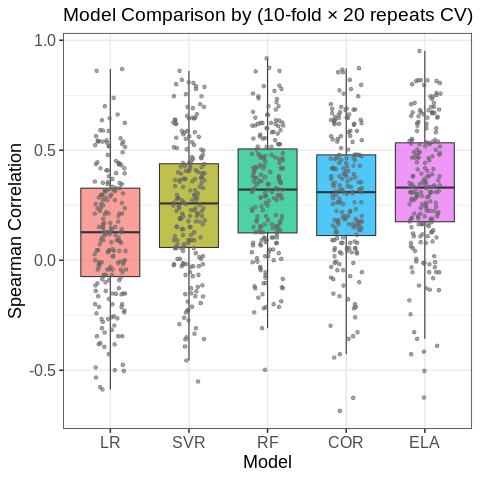

In [ ]:
%%R
evaluate_models_cv(ocmat_filtered, enmat_p_filtered, 1, metric = "correlation", external_scores=combined_score_oc)

$plot

$summary_table
  Method      Mean        SD        Min         Q1    Median        Q3
1     LR 0.1883190 0.3169038 -0.7015964 0.01821292 0.2058134 0.4132017
2    SVR 0.2571696 0.3080452 -0.8154919 0.05151515 0.2707603 0.4936421
3     RF 0.2538189 0.3201853 -0.6969697 0.02658025 0.2939394 0.4829447
4    COR 0.2282288 0.3019661 -0.8538902 0.01705323 0.2363636 0.4280303
5    ELA 0.3313171 0.2848432 -0.6242424 0.17500000 0.3303030 0.5338642
        Max
1 0.8974966
2 0.9030303
3 0.8753840
4 0.8303030
5 0.9515152



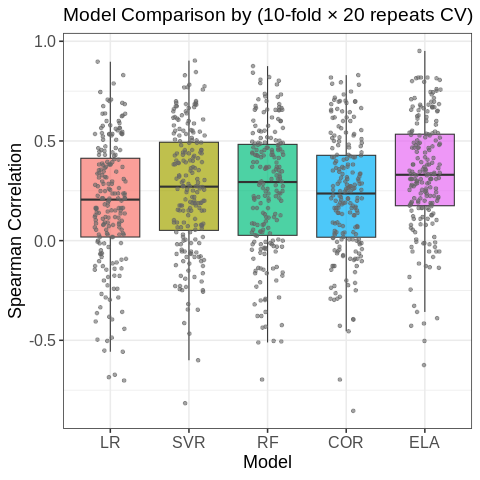

In [ ]:
%%R
# comparison to machine learning methods
evaluate_models_cv(abmat_filtered, enmat_p_filtered, 1, metric = "correlation", external_scores=combined_score)